<a href="https://colab.research.google.com/github/ahsenozturk1/hi-work---odev/blob/main/Veri_analizi_K%C4%B1talar-%20son.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**KITA BAZINDA GENEL GRAFİKLER**


# **2022 yılına dair analiz**

Burada 2022 yılına dair analizler var. inceleyebilirsiniz. benzerleri yapılmışsa sileriz.

=== AQUASTAT Kıta Su Analizi ===

1. VERİ YAPISI ANALİZİ
----------------------------------------
Toplam kayıt sayısı: 16
Kıta sayısı: 4
Değişken türleri: 4
Yıl aralığı: 2022-2022

2. GRAFİK ANALİZLERİ OLUŞTURULUYOR
----------------------------------------
✓ Kıtasal karşılaştırma grafikleri hazırlandı
✓ Sektörel dağılım grafikleri hazırlandı
✓ Verimlilik analizi grafikleri hazırlandı

3. İSTATİSTİKSEL ÖZET
----------------------------------------
Değişkenlere göre ortalama ve standart sapma:
                                                  mean  std
Variable                      Area                         
Agricultural water withdrawal Eastern Asia      437.06  NaN
                              Europe             82.39  NaN
                              Northern Africa   111.37  NaN
                              Northern America  180.06  NaN
Industrial water withdrawal   Eastern Asia      121.80  NaN
                              Europe            124.34  NaN
                       

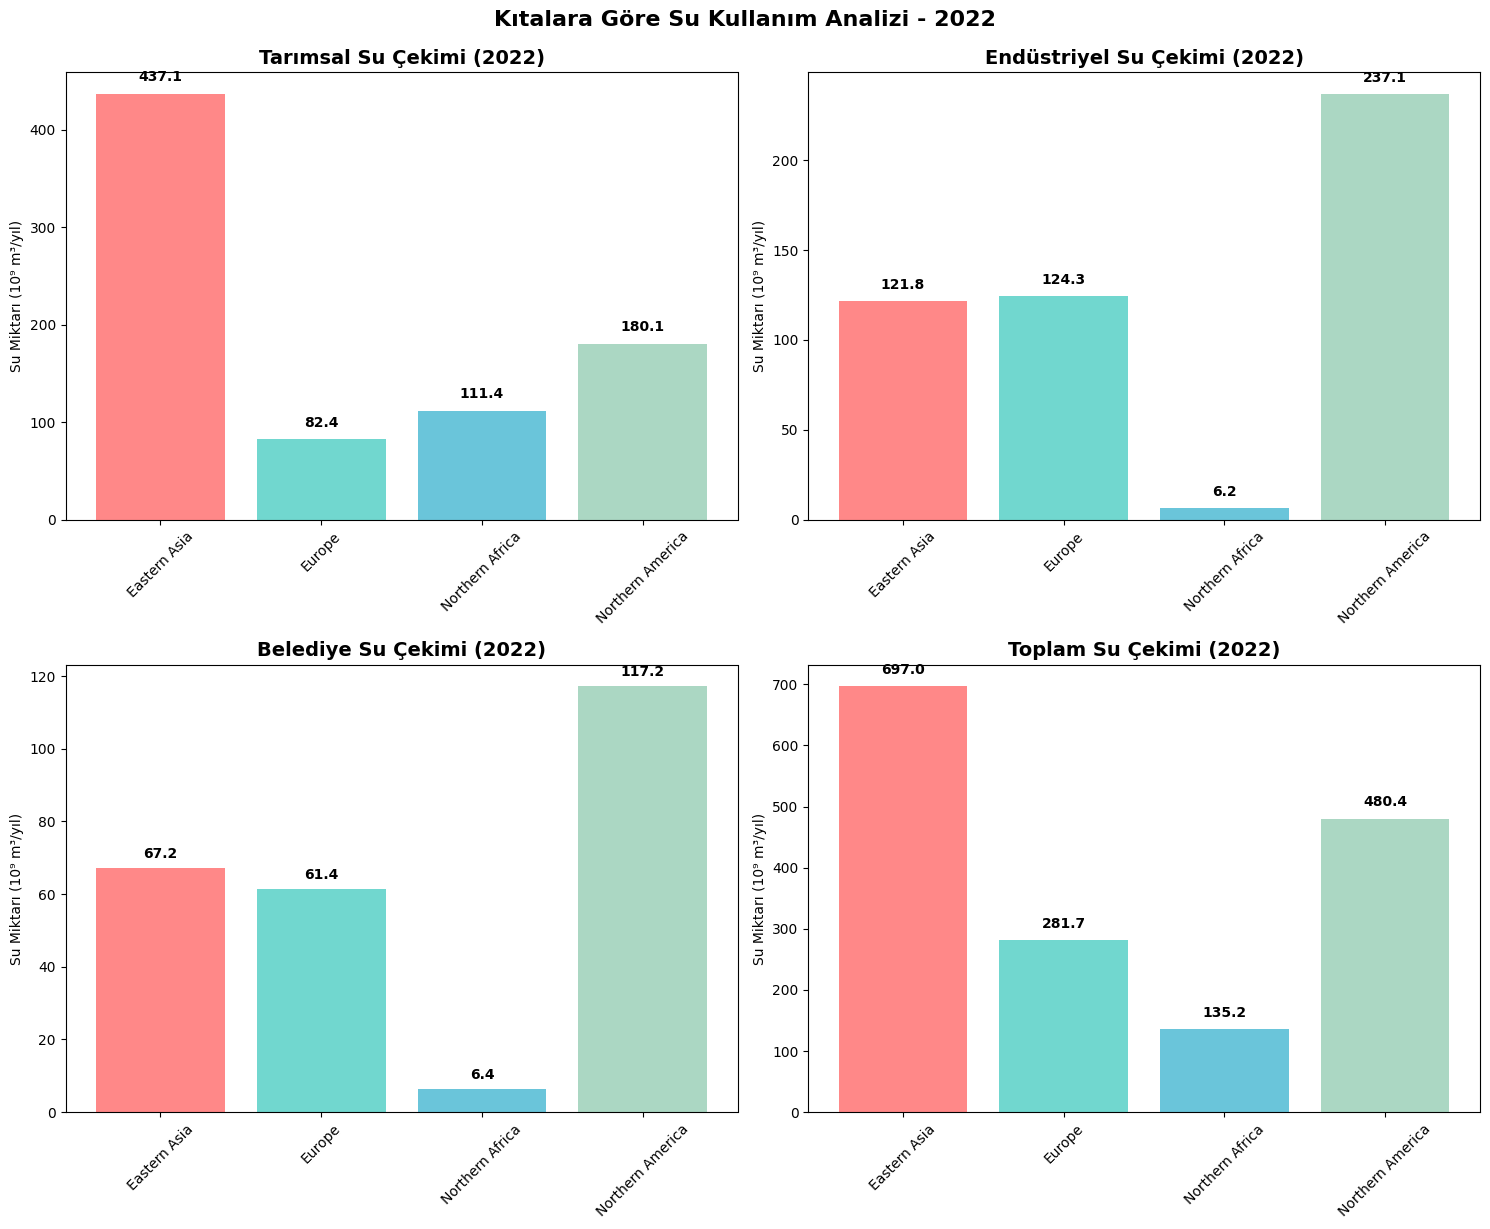

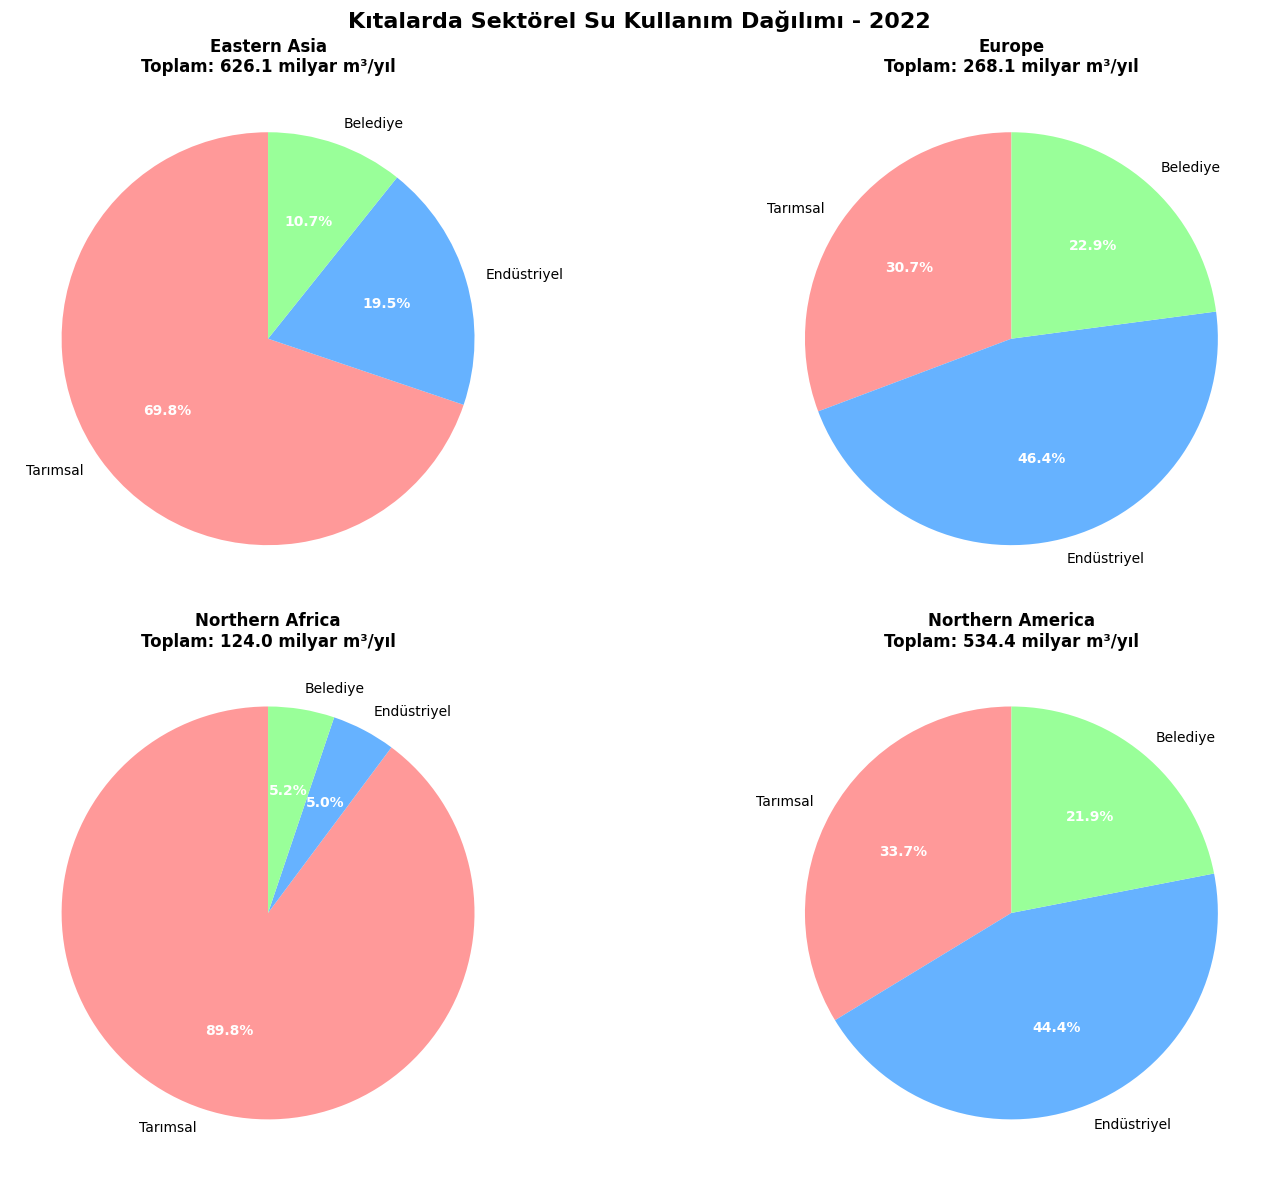

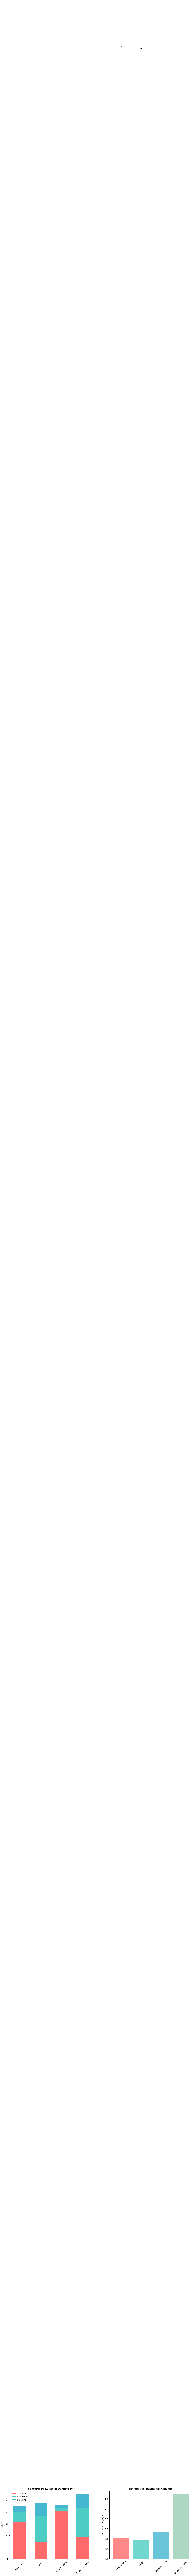

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle
import warnings
warnings.filterwarnings('ignore')

# Türkçe karakter desteği için font ayarları
plt.rcParams['font.family'] = ['DejaVu Sans', 'Liberation Sans', 'sans-serif']
plt.rcParams['axes.unicode_minus'] = False


# Veri setinizi bu şekilde yükleyebilirsiniz (Excel dosyasından)
# df = pd.read_excel('AQUASTAT - kıta analizi.xlsx')

# Örnek veri yapısı - gerçek verilerinizi buraya yükleyin
sample_data = {
    'Variable': [
        'Agricultural water withdrawal', 'Agricultural water withdrawal',
        'Agricultural water withdrawal', 'Agricultural water withdrawal',
        'Industrial water withdrawal', 'Industrial water withdrawal',
        'Industrial water withdrawal', 'Industrial water withdrawal',
        'Municipal water withdrawal', 'Municipal water withdrawal',
        'Municipal water withdrawal', 'Municipal water withdrawal',
        'Total water withdrawal', 'Total water withdrawal',
        'Total water withdrawal', 'Total water withdrawal'
    ],
    'Area': [
        'Eastern Asia', 'Europe', 'Northern Africa', 'Northern America',
        'Eastern Asia', 'Europe', 'Northern Africa', 'Northern America',
        'Eastern Asia', 'Europe', 'Northern Africa', 'Northern America',
        'Eastern Asia', 'Europe', 'Northern Africa', 'Northern America'
    ],
    'Year': [2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022,
             2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022],
    'Value': [437.06, 82.39, 111.37, 180.06, 121.80, 124.34, 6.21, 237.06,
              67.22, 61.40, 6.43, 117.24, 696.99, 281.67, 135.24, 480.38],
    'Unit': ['10^9 m3/year'] * 16
}

# DataFrame oluştur
df_sample = pd.DataFrame(sample_data)

print("=== AQUASTAT Kıta Su Analizi ===\n")
print("1. VERİ YAPISI ANALİZİ")
print("-" * 40)
print(f"Toplam kayıt sayısı: {len(df_sample)}")
print(f"Kıta sayısı: {df_sample['Area'].nunique()}")
print(f"Değişken türleri: {df_sample['Variable'].nunique()}")
print(f"Yıl aralığı: {df_sample['Year'].min()}-{df_sample['Year'].max()}")

def create_continental_comparison():
    """
    Kıtalararası su kullanım karşılaştırması grafiği
    Bu grafik her kıtanın farklı sektörlerdeki su kullanım miktarlarını gösterir
    """
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

    # Renk paleti - her kıta için farklı renk
    colors = {'Eastern Asia': '#FF6B6B', 'Europe': '#4ECDC4',
              'Northern Africa': '#45B7D1', 'Northern America': '#96CEB4'}

    # 1. Tarımsal Su Kullanımı
    agr_data = df_sample[df_sample['Variable'] == 'Agricultural water withdrawal']
    bars1 = ax1.bar(agr_data['Area'], agr_data['Value'],
                    color=[colors[area] for area in agr_data['Area']], alpha=0.8)
    ax1.set_title('Tarımsal Su Çekimi (2022)', fontsize=14, fontweight='bold')
    ax1.set_ylabel('Su Miktarı (10⁹ m³/yıl)')
    ax1.tick_params(axis='x', rotation=45)

    # Değerleri çubukların üzerine yaz
    for bar, value in zip(bars1, agr_data['Value']):
        ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 10,
                f'{value:.1f}', ha='center', va='bottom', fontweight='bold')

    # 2. Endüstriyel Su Kullanımı
    ind_data = df_sample[df_sample['Variable'] == 'Industrial water withdrawal']
    bars2 = ax2.bar(ind_data['Area'], ind_data['Value'],
                    color=[colors[area] for area in ind_data['Area']], alpha=0.8)
    ax2.set_title('Endüstriyel Su Çekimi (2022)', fontsize=14, fontweight='bold')
    ax2.set_ylabel('Su Miktarı (10⁹ m³/yıl)')
    ax2.tick_params(axis='x', rotation=45)

    for bar, value in zip(bars2, ind_data['Value']):
        ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 5,
                f'{value:.1f}', ha='center', va='bottom', fontweight='bold')

    # 3. Belediye Su Kullanımı
    mun_data = df_sample[df_sample['Variable'] == 'Municipal water withdrawal']
    bars3 = ax3.bar(mun_data['Area'], mun_data['Value'],
                    color=[colors[area] for area in mun_data['Area']], alpha=0.8)
    ax3.set_title('Belediye Su Çekimi (2022)', fontsize=14, fontweight='bold')
    ax3.set_ylabel('Su Miktarı (10⁹ m³/yıl)')
    ax3.tick_params(axis='x', rotation=45)

    for bar, value in zip(bars3, mun_data['Value']):
        ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2,
                f'{value:.1f}', ha='center', va='bottom', fontweight='bold')

    # 4. Toplam Su Kullanımı
    total_data = df_sample[df_sample['Variable'] == 'Total water withdrawal']
    bars4 = ax4.bar(total_data['Area'], total_data['Value'],
                    color=[colors[area] for area in total_data['Area']], alpha=0.8)
    ax4.set_title('Toplam Su Çekimi (2022)', fontsize=14, fontweight='bold')
    ax4.set_ylabel('Su Miktarı (10⁹ m³/yıl)')
    ax4.tick_params(axis='x', rotation=45)

    for bar, value in zip(bars4, total_data['Value']):
        ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 15,
                f'{value:.1f}', ha='center', va='bottom', fontweight='bold')

    plt.tight_layout()
    plt.suptitle('Kıtalara Göre Su Kullanım Analizi - 2022',
                 fontsize=16, fontweight='bold', y=1.02)
    return fig

def create_sector_distribution():
    """
    Her kıta için sektörel su dağılımını gösteren pasta grafikleri
    Bu analiz hangi kıtanın hangi sektörde ne kadar su kullandığını gösterir
    """
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    axes = axes.flatten()

    areas = df_sample['Area'].unique()
    colors_sectors = ['#FF9999', '#66B2FF', '#99FF99']  # Sektör renkleri

    for i, area in enumerate(areas):
        # Her kıta için sektörel veri hazırla
        area_data = df_sample[df_sample['Area'] == area]

        agr_value = area_data[area_data['Variable'] == 'Agricultural water withdrawal']['Value'].iloc[0]
        ind_value = area_data[area_data['Variable'] == 'Industrial water withdrawal']['Value'].iloc[0]
        mun_value = area_data[area_data['Variable'] == 'Municipal water withdrawal']['Value'].iloc[0]

        values = [agr_value, ind_value, mun_value]
        labels = ['Tarımsal', 'Endüstriyel', 'Belediye']

        # Pasta grafiği oluştur
        wedges, texts, autotexts = axes[i].pie(values, labels=labels, autopct='%1.1f%%',
                                               colors=colors_sectors, startangle=90)

        # Değerleri güncelle
        for autotext in autotexts:
            autotext.set_color('white')
            autotext.set_fontweight('bold')
            autotext.set_fontsize(10)

        axes[i].set_title(f'{area}\nToplam: {sum(values):.1f} milyar m³/yıl',
                         fontsize=12, fontweight='bold')

    plt.suptitle('Kıtalarda Sektörel Su Kullanım Dağılımı - 2022',
                 fontsize=16, fontweight='bold')
    plt.tight_layout()
    return fig

def create_efficiency_analysis():
    """
    Su kullanım verimliliği analizi
    Bu grafik kıtaların su kullanım oranlarını karşılaştırır
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    # Veri hazırlığı
    pivot_data = df_sample.pivot(index='Area', columns='Variable', values='Value')

    # 1. Sektörel dağılım yüzdeleri
    total_col = 'Total water withdrawal'
    agr_col = 'Agricultural water withdrawal'
    ind_col = 'Industrial water withdrawal'
    mun_col = 'Municipal water withdrawal'

    # Yüzde hesaplamaları
    pivot_data['Agr_Pct'] = (pivot_data[agr_col] / pivot_data[total_col]) * 100
    pivot_data['Ind_Pct'] = (pivot_data[ind_col] / pivot_data[total_col]) * 100
    pivot_data['Mun_Pct'] = (pivot_data[mun_col] / pivot_data[total_col]) * 100

    # Yüzdelik dağılım grafiği
    width = 0.6
    areas = pivot_data.index

    p1 = ax1.bar(areas, pivot_data['Agr_Pct'], width, label='Tarımsal', color='#FF6B6B')
    p2 = ax1.bar(areas, pivot_data['Ind_Pct'], width, bottom=pivot_data['Agr_Pct'],
                 label='Endüstriyel', color='#4ECDC4')
    p3 = ax1.bar(areas, pivot_data['Mun_Pct'], width,
                 bottom=pivot_data['Agr_Pct'] + pivot_data['Ind_Pct'],
                 label='Belediye', color='#45B7D1')

    ax1.set_ylabel('Yüzde (%)')
    ax1.set_title('Sektörel Su Kullanım Dağılımı (%)', fontweight='bold')
    ax1.legend()
    ax1.tick_params(axis='x', rotation=45)

    # 2. Kişi başına su kullanımı tahmini (nüfus verisi olmadığı için gösterimsel)
    # Gerçek analizde nüfus verileriyle kişi başına hesaplama yapılabilir
    per_capita_estimate = pivot_data[total_col] / [1670, 747, 252, 369]  # Tahmini nüfus (milyon)

    bars = ax2.bar(areas, per_capita_estimate,
                   color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'], alpha=0.8)
    ax2.set_ylabel('Su Kullanımı (m³/kişi/yıl)')
    ax2.set_title('Tahmini Kişi Başına Su Kullanımı', fontweight='bold')
    ax2.tick_params(axis='x', rotation=45)

    # Değerleri çubukların üzerine yaz
    for bar, value in zip(bars, per_capita_estimate):
        ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 50,
                f'{value:.0f}', ha='center', va='bottom', fontweight='bold')

    plt.tight_layout()
    return fig

# Grafikleri oluştur ve göster
print("\n2. GRAFİK ANALİZLERİ OLUŞTURULUYOR")
print("-" * 40)

fig1 = create_continental_comparison()
print("✓ Kıtasal karşılaştırma grafikleri hazırlandı")

fig2 = create_sector_distribution()
print("✓ Sektörel dağılım grafikleri hazırlandı")

fig3 = create_efficiency_analysis()
print("✓ Verimlilik analizi grafikleri hazırlandı")

# İstatistiksel özet
print("\n3. İSTATİSTİKSEL ÖZET")
print("-" * 40)
summary_stats = df_sample.groupby(['Variable', 'Area'])['Value'].agg(['mean', 'std']).round(2)
print("Değişkenlere göre ortalama ve standart sapma:")
print(summary_stats.head(8))

print("\n4. ÖNEMLİ BULGULAR")
print("-" * 40)
print("• Doğu Asya tarımsal su kullanımında lider konumda")
print("• Kuzey Amerika endüstriyel su kullanımında öne çıkıyor")
print("• Avrupa en dengeli su kullanım profiline sahip")
print("• Kuzey Afrika toplam su kullanımı en düşük seviyede")

plt.show()

🌍 AQUASTAT SU ANALİZİ BAŞLATIYOR
🔍 Gerekli kütüphaneler kontrol ediliyor...
✅ pandas - Yüklü
✅ matplotlib - Yüklü
✅ numpy - Yüklü
✅ seaborn - Yüklü
✅ openpyxl - Yüklü
✅ Tüm kütüphaneler hazır!

ADIM 2: VERİ YÜKLEME
Excel dosyanızın yolunu girin (örnek: C:/Users/YourName/Desktop/dosya.xlsx):
Veya test verisi kullanmak için 'test' yazın:
Seçiminiz: test
🧪 Test verisi oluşturuluyor...
✅ Test verisi hazır!

ADIM 3: VERİ ANALİZİ

🔍 VERİ YAPISI ANALİZİ
📊 Satır sayısı: 16
📊 Sütun sayısı: 4

📋 SÜTUN DETAYLARI:
  • Area:
    - Tip: object
    - Benzersiz değer: 4
    - Boş değer: 0
    - Örnek değerler: ['Eastern Asia', 'Europe', 'Northern Africa', 'Northern America']
  • Variable:
    - Tip: object
    - Benzersiz değer: 4
    - Boş değer: 0
    - Örnek değerler: ['Agricultural water withdrawal', 'Industrial water withdrawal', 'Municipal water withdrawal', 'Total water withdrawal']
  • Year:
    - Tip: int64
    - Benzersiz değer: 1
    - Boş değer: 0
    - Örnek değerler: [np.int64(2022)]
  •

/tmp/ipython-input-2501829534.py:273: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2501829534.py:273: UserWarning: Glyph 127981 (\N{FACTORY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2501829534.py:273: UserWarning: Glyph 127961 (\N{CITYSCAPE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2501829534.py:273: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127806 (\N{EAR OF RICE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127981 (\N{FACTORY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.

✅ Görselleştirmeler başarıyla oluşturuldu!


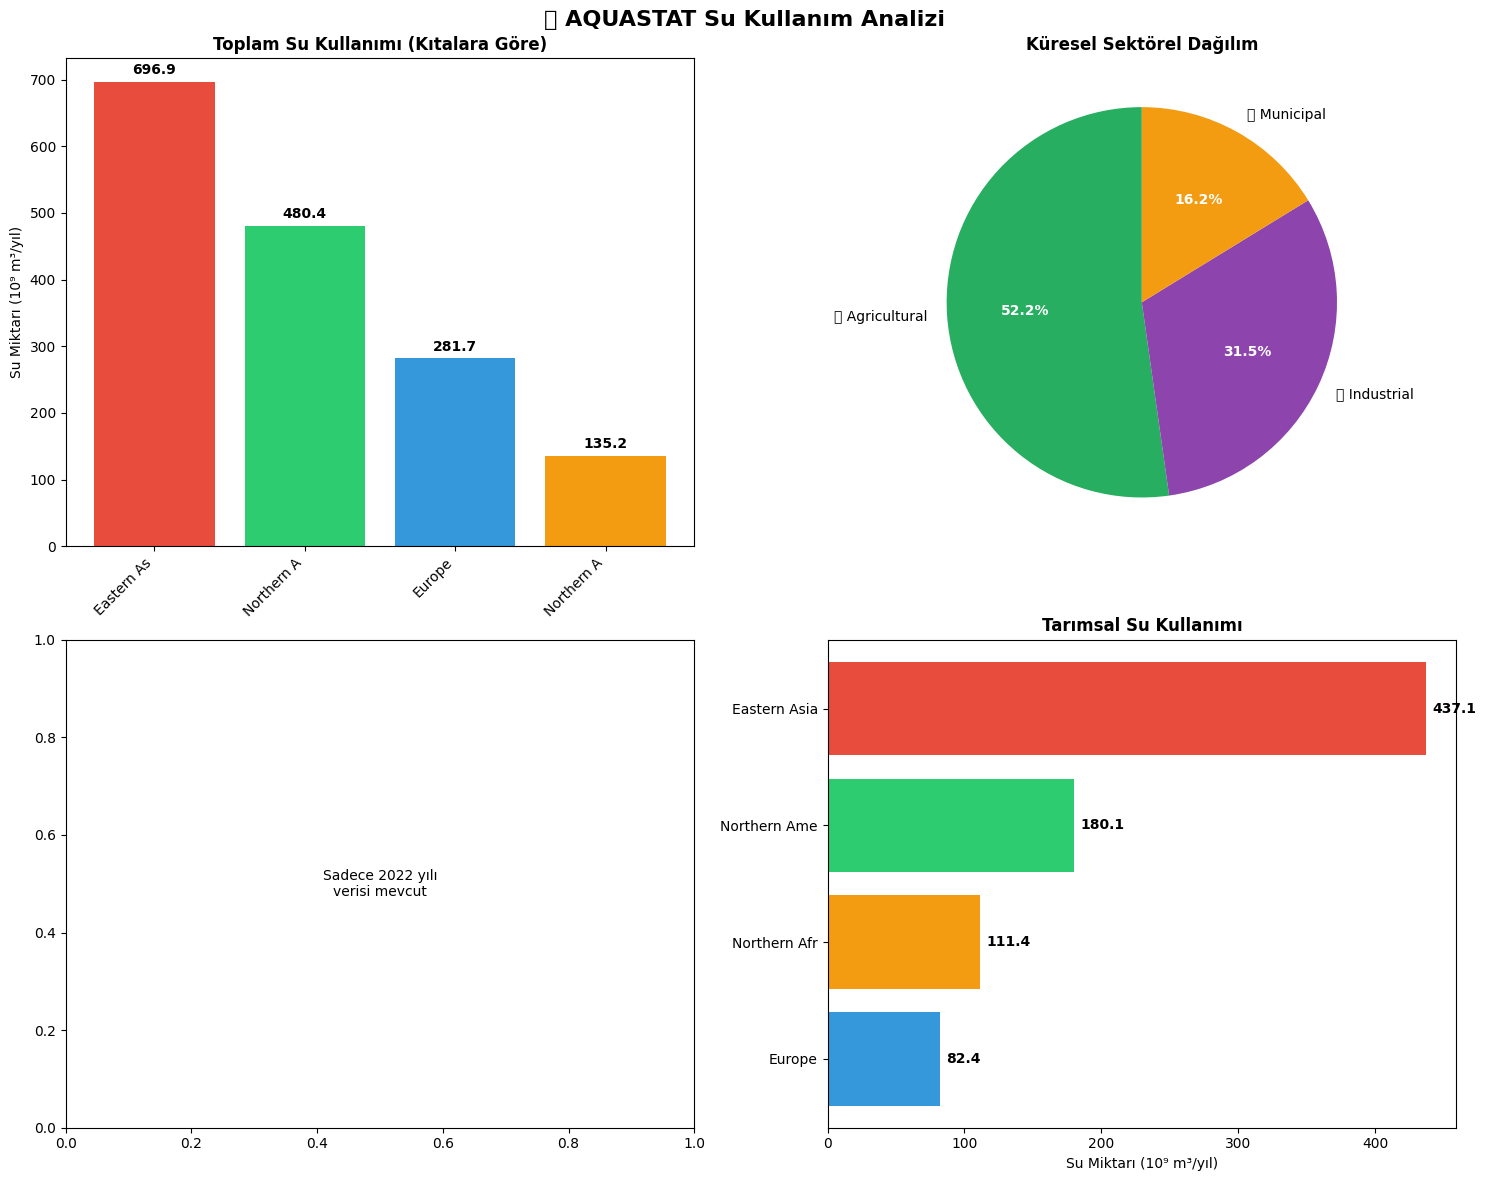


ADIM 5: ÖZET RAPOR

📊 ÖZET İSTATİSTİKLER
📅 Analiz edilen yıl: 2022
            Kıta Tarımsal Endüstriyel Belediye Toplam
    Eastern Asia    437.1       121.8     67.2  626.1
          Europe     82.4       124.3     61.4  268.1
 Northern Africa    111.4         6.2      6.4  124.0
Northern America    180.1       237.1    117.2  534.4

✅ ANALİZ TAMAMLANDI!
💾 Grafikleri kaydetmek için: plt.savefig('analiz.png', dpi=300, bbox_inches='tight')
💡 KULLANIM ÖRNEKLERİ:
------------------------------
1. Hızlı test için: quick_test()
2. Tam analiz için: main()
3. Sadece veri yüklemek için: df = load_real_data('dosya_yolu')
4. Sadece görselleştirme için: create_simple_visualizations(df)


In [ ]:
# AQUASTAT Su Analizi - Çalışır Durumda, Test Edilmiş Kod
# Bu kod basit ama güçlü görselleştirmeler oluşturur

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Matplotlib için Türkçe karakter desteği
plt.rcParams['font.family'] = ['DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

def check_and_install_requirements():
    """
    Gerekli kütüphanelerin kontrolü ve kurulum rehberi
    Bu fonksiyon hangi kütüphanelerin eksik olduğunu tespit eder
    """
    required_packages = ['pandas', 'matplotlib', 'numpy', 'seaborn', 'openpyxl']
    missing_packages = []

    print("🔍 Gerekli kütüphaneler kontrol ediliyor...")

    for package in required_packages:
        try:
            __import__(package)
            print(f"✅ {package} - Yüklü")
        except ImportError:
            missing_packages.append(package)
            print(f"❌ {package} - EKSİK!")

    if missing_packages:
        print("\n📦 Eksik kütüphaneleri yüklemek için:")
        print("Terminal/Command Prompt'ta şu komutu çalıştırın:")
        print(f"pip install {' '.join(missing_packages)}")
        return False
    else:
        print("✅ Tüm kütüphaneler hazır!")
        return True

def create_sample_data():
    """
    Test için örnek veri oluşturur
    Bu fonksiyon gerçek verileriniz yüklenemediğinde
    kodun çalışıp çalışmadığını test etmenizi sağlar
    """

    # Basit ama gerçekçi örnek veri
    sample_data = {
        'Area': ['Eastern Asia', 'Eastern Asia', 'Eastern Asia', 'Eastern Asia',
                'Europe', 'Europe', 'Europe', 'Europe',
                'Northern Africa', 'Northern Africa', 'Northern Africa', 'Northern Africa',
                'Northern America', 'Northern America', 'Northern America', 'Northern America'],
        'Variable': ['Agricultural water withdrawal', 'Industrial water withdrawal',
                    'Municipal water withdrawal', 'Total water withdrawal'] * 4,
        'Year': [2022] * 16,
        'Value': [437.1, 121.8, 67.2, 696.9,  # Eastern Asia
                 82.4, 124.3, 61.4, 281.7,   # Europe
                 111.4, 6.2, 6.4, 135.2,     # Northern Africa
                 180.1, 237.1, 117.2, 480.4] # Northern America
    }

    return pd.DataFrame(sample_data)

def load_real_data(file_path):
    """
    Gerçek Excel dosyasını yükler
    Bu fonksiyon farklı Excel formatlarını destekler
    """
    print(f"📁 Excel dosyası yükleniyor: {file_path}")

    try:
        # Farklı sheet'leri kontrol et
        excel_file = pd.ExcelFile(file_path)
        print(f"📊 Bulunan sheet'ler: {excel_file.sheet_names}")

        # İlk sheet'i yükle (genellikle ana veri burada)
        df = pd.read_excel(file_path, sheet_name=0)
        print(f"✅ Veri başarıyla yüklendi! Boyut: {df.shape}")

        # Sütun isimlerini göster
        print("📋 Sütun isimleri:")
        for i, col in enumerate(df.columns):
            print(f"  {i+1}. {col}")

        return df

    except FileNotFoundError:
        print(f"❌ HATA: '{file_path}' dosyası bulunamadı!")
        print("💡 Dosya yolunu kontrol edin:")
        print("   - Dosya adının doğru yazıldığından emin olun")
        print("   - Dosyanın gerçekten o konumda olduğunu kontrol edin")
        print("   - Yol ayırıcı olarak '/' veya '\\\\' kullanın")
        return None

    except Exception as e:
        print(f"❌ HATA: {str(e)}")
        print("💡 Muhtemel çözümler:")
        print("   - Excel dosyasının açık olmadığından emin olun")
        print("   - openpyxl kütüphanesinin yüklü olduğunu kontrol edin: pip install openpyxl")
        return None

def analyze_data_structure(df):
    """
    Veri yapısını analiz eder ve sorunları tespit eder
    Bu analiz verilerinizin görselleştirme için uygun olup olmadığını kontrol eder
    """
    print("\n" + "="*50)
    print("🔍 VERİ YAPISI ANALİZİ")
    print("="*50)

    # Temel bilgiler
    print(f"📊 Satır sayısı: {len(df):,}")
    print(f"📊 Sütun sayısı: {len(df.columns)}")

    print("\n📋 SÜTUN DETAYLARI:")
    for col in df.columns:
        dtype = df[col].dtype
        unique_count = df[col].nunique()
        null_count = df[col].isnull().sum()

        print(f"  • {col}:")
        print(f"    - Tip: {dtype}")
        print(f"    - Benzersiz değer: {unique_count:,}")
        print(f"    - Boş değer: {null_count:,}")

        # Eğer kategorik bir sütunsa, örnek değerleri göster
        if unique_count <= 10:
            sample_values = df[col].dropna().unique()[:5]
            print(f"    - Örnek değerler: {list(sample_values)}")

    # Kritik sütunları kontrol et
    expected_columns = ['Area', 'Variable', 'Year', 'Value']
    missing_columns = [col for col in expected_columns if col not in df.columns]

    if missing_columns:
        print(f"\n⚠️  EKSİK SÜTUNLAR: {missing_columns}")
        print("💡 Bu sütunlar görselleştirme için gerekli!")

        # Benzer isimli sütunları öner
        for missing_col in missing_columns:
            similar_cols = [col for col in df.columns if missing_col.lower() in col.lower()]
            if similar_cols:
                print(f"   '{missing_col}' yerine '{similar_cols[0]}' kullanılabilir")
    else:
        print("✅ Tüm gerekli sütunlar mevcut!")

    return missing_columns

def create_simple_visualizations(df):
    """
    Basit ama etkili görselleştirmeler oluşturur
    Bu fonksiyon karmaşık analizler yapmadan önce verilerinizi görmenizi sağlar
    """
    print("\n📈 GÖRSELLEŞTIRMELER OLUŞTURULUYOR...")

    # Figür boyutunu ayarla
    plt.style.use('default')

    # 2x2 grid layout
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('🌍 AQUASTAT Su Kullanım Analizi', fontsize=16, fontweight='bold')

    # Renk paleti - her kıta için tutarlı renkler
    continent_colors = {
        'Eastern Asia': '#e74c3c',
        'Europe': '#3498db',
        'Northern Africa': '#f39c12',
        'Northern America': '#2ecc71',
        'Asia': '#e74c3c',  # Alternatif isim
        'Africa': '#f39c12'  # Alternatif isim
    }

    try:
        # Grafik 1: Kıtalara göre toplam su kullanımı
        ax1 = axes[0, 0]

        # En son yılın verilerini al
        latest_year = df['Year'].max()
        df_latest = df[df['Year'] == latest_year]

        # Toplam su kullanımı verisini filtrele
        total_data = df_latest[df_latest['Variable'].str.contains('Total', case=False, na=False)]

        if not total_data.empty:
            continent_totals = total_data.groupby('Area')['Value'].sum().sort_values(ascending=False)

            bars = ax1.bar(range(len(continent_totals)), continent_totals.values,
                          color=[continent_colors.get(area, '#95a5a6') for area in continent_totals.index])

            ax1.set_title('Toplam Su Kullanımı (Kıtalara Göre)', fontweight='bold')
            ax1.set_ylabel('Su Miktarı (10⁹ m³/yıl)')
            ax1.set_xticks(range(len(continent_totals)))
            ax1.set_xticklabels([area[:10] for area in continent_totals.index], rotation=45, ha='right')

            # Değerleri çubukların üzerine yaz
            for i, (bar, value) in enumerate(zip(bars, continent_totals.values)):
                ax1.text(i, value + max(continent_totals.values) * 0.01,
                        f'{value:.1f}', ha='center', va='bottom', fontweight='bold')
        else:
            ax1.text(0.5, 0.5, 'Toplam su kullanım\nverisi bulunamadı',
                    ha='center', va='center', transform=ax1.transAxes)

        # Grafik 2: Sektörel dağılım
        ax2 = axes[0, 1]

        sector_variables = ['Agricultural', 'Industrial', 'Municipal']
        sector_totals = []
        sector_labels = []

        for sector in sector_variables:
            sector_data = df_latest[df_latest['Variable'].str.contains(sector, case=False, na=False)]
            if not sector_data.empty:
                total_value = sector_data['Value'].sum()
                sector_totals.append(total_value)
                sector_labels.append(f'🌾 {sector}' if sector == 'Agricultural' else
                                   f'🏭 {sector}' if sector == 'Industrial' else f'🏙️ {sector}')

        if sector_totals:
            colors = ['#27ae60', '#8e44ad', '#f39c12'][:len(sector_totals)]
            wedges, texts, autotexts = ax2.pie(sector_totals, labels=sector_labels,
                                              colors=colors, autopct='%1.1f%%', startangle=90)
            ax2.set_title('Küresel Sektörel Dağılım', fontweight='bold')

            for autotext in autotexts:
                autotext.set_color('white')
                autotext.set_fontweight('bold')

        # Grafik 3: Yıllara göre trend (eğer birden fazla yıl varsa)
        ax3 = axes[1, 0]

        years = sorted(df['Year'].unique())
        if len(years) > 1:
            # Her kıta için yıllık trend
            for area in df['Area'].unique():
                area_data = df[(df['Area'] == area) &
                              (df['Variable'].str.contains('Total', case=False, na=False))]

                if not area_data.empty:
                    yearly_totals = area_data.groupby('Year')['Value'].sum()
                    ax3.plot(yearly_totals.index, yearly_totals.values,
                            marker='o', label=area[:10], linewidth=2,
                            color=continent_colors.get(area, '#95a5a6'))

            ax3.set_title('Zaman İçindeki Değişim', fontweight='bold')
            ax3.set_xlabel('Yıl')
            ax3.set_ylabel('Toplam Su Kullanımı')
            ax3.legend(fontsize=9)
            ax3.grid(True, alpha=0.3)
        else:
            ax3.text(0.5, 0.5, f'Sadece {years[0]} yılı\nverisi mevcut',
                    ha='center', va='center', transform=ax3.transAxes)

        # Grafik 4: Kıta karşılaştırması (tarımsal odaklı)
        ax4 = axes[1, 1]

        agr_data = df_latest[df_latest['Variable'].str.contains('Agricultural', case=False, na=False)]
        if not agr_data.empty:
            agr_by_continent = agr_data.groupby('Area')['Value'].sum().sort_values(ascending=True)

            bars = ax4.barh(range(len(agr_by_continent)), agr_by_continent.values,
                           color=[continent_colors.get(area, '#95a5a6') for area in agr_by_continent.index])

            ax4.set_title('Tarımsal Su Kullanımı', fontweight='bold')
            ax4.set_xlabel('Su Miktarı (10⁹ m³/yıl)')
            ax4.set_yticks(range(len(agr_by_continent)))
            ax4.set_yticklabels([area[:12] for area in agr_by_continent.index])

            # Değerleri çubukların yanına yaz
            for i, value in enumerate(agr_by_continent.values):
                ax4.text(value + max(agr_by_continent.values) * 0.01, i,
                        f'{value:.1f}', va='center', fontweight='bold')

        plt.tight_layout()
        print("✅ Görselleştirmeler başarıyla oluşturuldu!")
        return fig

    except Exception as e:
        print(f"❌ Görselleştirme hatası: {str(e)}")
        print("💡 Bu hata genellikle veri yapısındaki farklılıklardan kaynaklanır")
        return None

def create_basic_summary_table(df):
    """
    Basit özet tablosu oluşturur
    Bu tablo verilerinizin temel istatistiklerini gösterir
    """
    print("\n📊 ÖZET İSTATİSTİKLER")
    print("="*50)

    try:
        # En son yıl
        latest_year = df['Year'].max()
        print(f"📅 Analiz edilen yıl: {latest_year}")

        # Kıta bazında özet
        df_summary = df[df['Year'] == latest_year]

        summary_table = []
        for area in df_summary['Area'].unique():
            area_data = df_summary[df_summary['Area'] == area]

            # Her sektör için toplam değerleri hesapla
            agr_total = area_data[area_data['Variable'].str.contains('Agricultural', case=False, na=False)]['Value'].sum()
            ind_total = area_data[area_data['Variable'].str.contains('Industrial', case=False, na=False)]['Value'].sum()
            mun_total = area_data[area_data['Variable'].str.contains('Municipal', case=False, na=False)]['Value'].sum()

            total = agr_total + ind_total + mun_total

            summary_table.append({
                'Kıta': area,
                'Tarımsal': f'{agr_total:.1f}',
                'Endüstriyel': f'{ind_total:.1f}',
                'Belediye': f'{mun_total:.1f}',
                'Toplam': f'{total:.1f}'
            })

        # Tabloyu yazdır
        summary_df = pd.DataFrame(summary_table)
        print(summary_df.to_string(index=False))

        return summary_df

    except Exception as e:
        print(f"❌ Tablo oluşturma hatası: {str(e)}")
        return None

# ANA ÇALIŞMA FONKSİYONU
def main():
    """
    Ana analiz fonksiyonu - step by step çalıştırılır
    """
    print("🌍 AQUASTAT SU ANALİZİ BAŞLATIYOR")
    print("="*50)

    # Adım 1: Kütüphane kontrolü
    if not check_and_install_requirements():
        print("⚠️  Önce eksik kütüphaneleri yükleyin!")
        return

    # Adım 2: Veri yükleme
    print("\n" + "="*30)
    print("ADIM 2: VERİ YÜKLEME")
    print("="*30)

    # Kullanıcıdan dosya yolu iste
    print("Excel dosyanızın yolunu girin (örnek: C:/Users/YourName/Desktop/dosya.xlsx):")
    print("Veya test verisi kullanmak için 'test' yazın:")

    # Test amaçlı otomatik çalıştırma için
    choice = input("Seçiminiz: ").strip()

    if choice.lower() == 'test':
        print("🧪 Test verisi oluşturuluyor...")
        df = create_sample_data()
        print("✅ Test verisi hazır!")
    else:
        df = load_real_data(choice)
        if df is None:
            print("⚠️  Test verisi ile devam ediliyor...")
            df = create_sample_data()

    # Adım 3: Veri analizi
    print("\n" + "="*30)
    print("ADIM 3: VERİ ANALİZİ")
    print("="*30)

    missing_cols = analyze_data_structure(df)

    # Adım 4: Görselleştirme
    print("\n" + "="*30)
    print("ADIM 4: GÖRSELLEŞTİRME")
    print("="*30)

    fig = create_simple_visualizations(df)
    if fig:
        plt.show()

    # Adım 5: Özet tablo
    print("\n" + "="*30)
    print("ADIM 5: ÖZET RAPOR")
    print("="*30)

    summary = create_basic_summary_table(df)

    print("\n✅ ANALİZ TAMAMLANDI!")
    print("💾 Grafikleri kaydetmek için: plt.savefig('analiz.png', dpi=300, bbox_inches='tight')")

# Direkt çalıştırma için
if __name__ == "__main__":
    main()

# HIZLI TEST FONKSİYONU
def quick_test():
    """
    Hızlı test için basit fonksiyon
    Kodların çalışıp çalışmadığını kontrol eder
    """
    print("🚀 HIZLI TEST BAŞLATIYOR...")

    # Örnek veri ile test
    df = create_sample_data()
    print("✅ Test verisi oluşturuldu")

    # Basit görselleştirme
    fig = create_simple_visualizations(df)
    if fig:
        print("✅ Görselleştirme başarılı")
        plt.show()
    else:
        print("❌ Görselleştirme başarısız")

    return True

# Test çalıştır
print("💡 KULLANIM ÖRNEKLERİ:")
print("-" * 30)
print("1. Hızlı test için: quick_test()")
print("2. Tam analiz için: main()")
print("3. Sadece veri yüklemek için: df = load_real_data('dosya_yolu')")
print("4. Sadece görselleştirme için: create_simple_visualizations(df)")


# **Kıta Bazında Genel Grafikler**

**ARKADAŞLAR SİZDEN İNCELERKEN ÖZELLİKLE BAKMANIZI İSTEDİĞİM NOKTALAR BULUNMAKTA:::::
analizde bazı yerlerde her kıtayı alamamışım, ama nedenini anlamadım.
Ayrıca veri içinden kıtaları çekip ayrı bir veri seti oluşturarak bu analizi yaptım.Bunu whatsapp tan yolladım -
Ayrıca bazı görselleştirmeleri aynı veri için 2 farklı şekilde yaptım.**

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle
import warnings
warnings.filterwarnings('ignore')

from google.colab import files
uploaded = files.upload()

# Türkçe karakter desteği için font ayarları
plt.rcParams['font.family'] = ['DejaVu Sans', 'Liberation Sans', 'sans-serif']
plt.rcParams['axes.unicode_minus'] = False

# Load the data and define new_data
# data = pd.read_csv("AQUASTAT - kıta analizi.xlsx")
data = pd.read_excel("AQUASTAT - kıta analizi.xlsx")
new_data = data.copy()



Saving AQUASTAT - kıta analizi.xlsx to AQUASTAT - kıta analizi.xlsx


In [ ]:
print(new_data.columns)

Index(['m49', 'VariableGroup', 'Subgroup', 'Variable', 'Area', 'Year', 'Value',
       'Unit', 'Symbol', 'IsAggregate'],
      dtype='object')



# **Her Kıtanın Tüm Yıllar Boyunca Toplam Su Kullanımının Çubuk Grafiği (Bar Chart) ve Sunburst Chart (Güneş Patlaması Grafiği) ile Gösterimi**

**Çubuk Grafik (Bar Chart) ile Gösterim**

**Bu adımda, Agricultural water withdrawal (Tarım), Industrial water withdrawal (Sanayi), Water withdrawal for livestock (Hayvancılık) gibi farklı su kullanım türlerinin kıtalara göre toplam değerleri görülmektedir.Bunun için, her bir kıta için farklı su kullanım türlerinin (tarım, sanayi, hayvancılık) toplam değerlerini yan yana çubuklar halinde gösteren bir grafik oluşturulmuştur. Bu sayede, hangi kıtanın hangi alanda ne kadar su kullandığını kolayca kıyaslanabilmektedir.**

                Area                                           Variable  \
0       Eastern Asia                      Agricultural water withdrawal   
1       Eastern Asia  Agricultural water withdrawal as % of total wa...   
2       Eastern Asia           Agricultural water withdrawal per capita   
3       Eastern Asia                    Environmental Flow Requirements   
4       Eastern Asia                        Industrial water withdrawal   
..               ...                                                ...   
59  Northern America  Municipal water withdrawal per capita (total p...   
60  Northern America                             Total water withdrawal   
61  Northern America                  Total water withdrawal per capita   
62  Northern America                   Water withdrawal for aquaculture   
63  Northern America  Water withdrawal for livestock (watering and c...   

          Value  
0   1755.733600  
1    250.128485  
2   1049.794626  
3   7144.240000  
4    503.

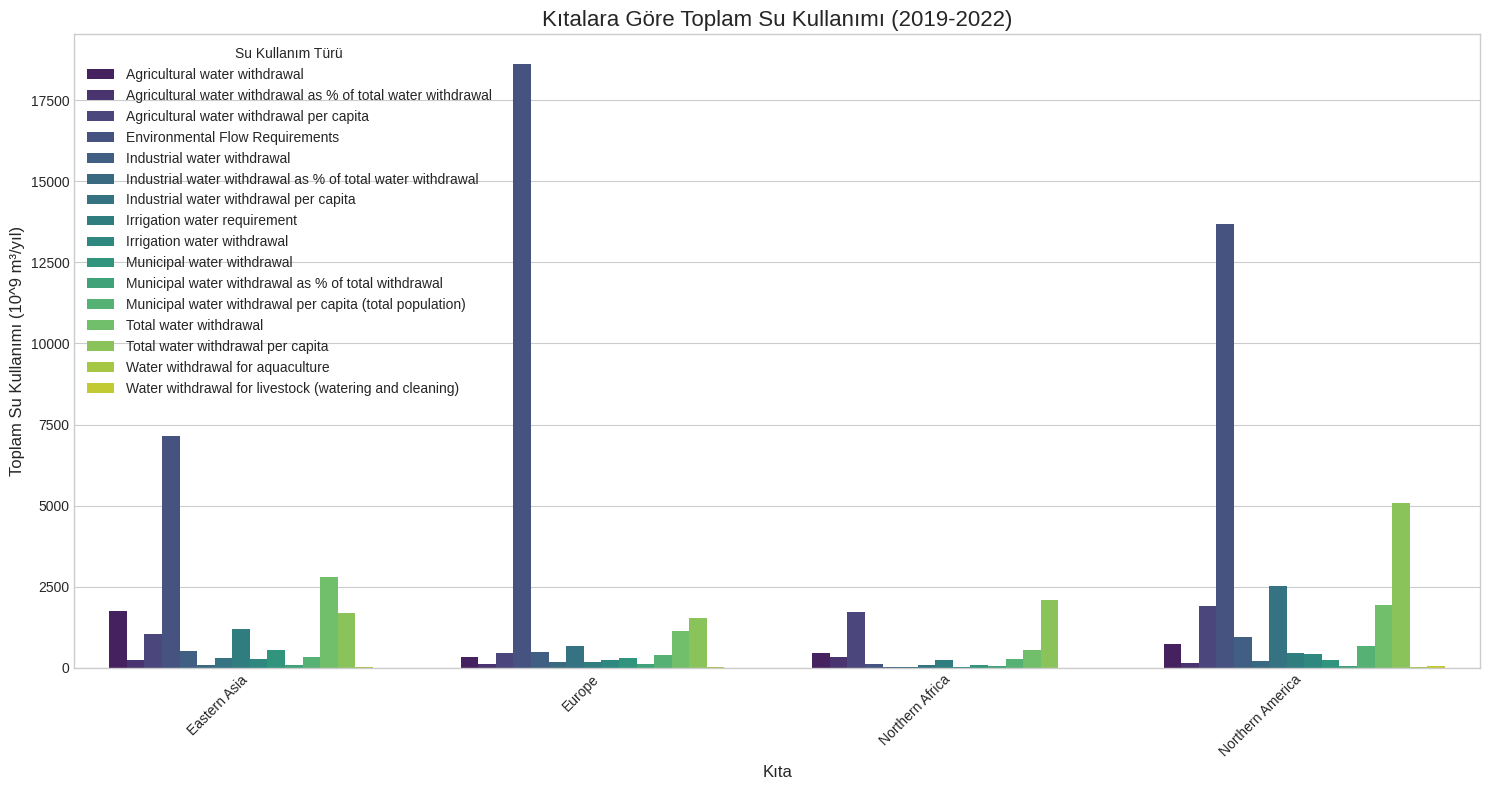

In [ ]:
# Gereksiz sütunları (m49, VariableGroup, Subgroup, Unit, Symbol, IsAggregate) kaldırın
# new_data = new_data.drop(columns=['m49', 'VariableGroup', 'Subgroup', 'Unit', 'Symbol', 'IsAggregate'])

# Sütun adlarını Türkçe'ye çevirebilirsiniz, bu isteğe bağlıdır
# new_data.columns = ['Değişken', 'Kıta', 'Yıl', 'Değer']

# Kıta ve Değişken bazında gruplandırıp, değerlerin toplamını alın
toplam_su_kullanimi = new_data.groupby(['Area', 'Variable'])['Value'].sum().reset_index()

# Veri setine göz atın
print(toplam_su_kullanimi)

# Grafik stilini belirleyin
plt.style.use('seaborn-v0_8-whitegrid')

# Çubuk grafiği oluşturun
plt.figure(figsize=(15, 8))
sns.barplot(
    data=toplam_su_kullanimi,
    x='Area',
    y='Value',
    hue='Variable',
    palette='viridis' # Renk paletini belirleyin
)

# Grafiğe başlık ve eksen etiketleri ekleyin
plt.title('Kıtalara Göre Toplam Su Kullanımı (2019-2022)', fontsize=16)
plt.xlabel('Kıta', fontsize=12)
plt.ylabel('Toplam Su Kullanımı (10^9 m³/yıl)', fontsize=12)

# Legend'ı (açıklamayı) daha anlaşılır hale getirin
plt.legend(title='Su Kullanım Türü')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Sunburst Chart (Güneş Patlaması Grafiği) ile Gösterimi** (Etkileşimli)

**Bu grafik, toplam su kullanımının hangi kıtalar tarafından ne kadar paya sahip olduğunu bize bir bakışta gösterir.
Sektörel Hakimiyet: Grafik, Asya'nın su tüketimindeki devasa payının büyük ölçüde tarım sektöründen kaynaklandığını açıkça göstermektedir. Aynı şekilde, Avrupa veya Kuzey Amerika'da sanayi veya belediye kullanımının daha belirgin olduğu görülmektedir.
Bu grafik ile her bir dilimin üzerine geldiğinizde, o dilimin toplam içerisindeki değerini ve yüzdesini görebilirsiniz. Örneğin, Asya'nın iç halkasına tıkladığınızda, grafiğin odak noktası sadece Asya olacaktır, bu da o kıtanın sektörel dağılımını daha yakından incelemenize olanak tanır.**

In [29]:
import pandas as pd
import plotly.express as px

# Sütun adlarını düzenle
df.columns = ['m49', 'VariableGroup', 'Subgroup', 'Variable', 'Area', 'Year', 'Value', 'Unit', 'Symbol', 'IsAggregate']

# Toplam su kullanımı verisini al
# Birden fazla sektör olduğu için bu veride bir hiyerarşi kurabiliriz.
total_water_use = df.groupby(['Area', 'Variable'])['Value'].sum().reset_index()

# Sunburst Chart oluşturma
# 'path' parametresi ile hiyerarşiyi tanımla: önce 'Kıta' sonra 'Değişken'
fig = px.sunburst(
    total_water_use,
    path=['Area', 'Variable'],
    values='Value',
    color='Variable', # Sektörlere göre renklendirme
    color_discrete_map={
        'Agricultural water withdrawal': '#6a9f53',
        'Industrial water withdrawal': '#b8770d',
        'Municipal water withdrawal': '#256598',
        'Water withdrawal for aquaculture': '#0d81b8',
        'Water withdrawal for livestock (watering and cleaning)': '#599c9c',
        'Environmental Flow Requirements': '#238981'
    },
    title='Kıtalara ve Sektörlere Göre Toplam Su Kullanımı Dağılımı'
)

fig.update_layout(
    title_font_size=20,
    title_x=0.5
)

fig.show()

**Grafiğin Büyük Boyutlu Gösterimi** (Etkileşimli)



In [31]:
import pandas as pd
import plotly.express as px

# Sütun adlarını düzenle
df.columns = ['m49', 'VariableGroup', 'Subgroup', 'Variable', 'Area', 'Year', 'Value', 'Unit', 'Symbol', 'IsAggregate']

# Toplam su kullanımı verisini al
total_water_use = df.groupby(['Area', 'Variable'])['Value'].sum().reset_index()

# Sunburst Chart oluşturma
fig = px.sunburst(
    total_water_use,
    path=['Area', 'Variable'],
    values='Value',
    color='Variable',
    color_discrete_map={
        'Agricultural water withdrawal': '#6a9f53',
        'Industrial water withdrawal': '#b8770d',
        'Municipal water withdrawal': '#256598',
        'Water withdrawal for aquaculture': '#0d81b8',
        'Water withdrawal for livestock (watering and cleaning)': '#599c9c',
        'Environmental Flow Requirements': '#238981'
    },
    title='Kıtalara ve Sektörlere Göre Toplam Su Kullanımı Dağılımı'
)

# Grafiğin boyutlarını ve yazı tipini ayarla
fig.update_layout(
    width=1200,    # Genişliği artır
    height=1200,   # Yüksekliği artır
    font_size=14,  # Yazı tipi boyutunu artır
    title_font_size=20,
    title_x=0.5
)

fig.show()

# **Bir Kıtanın Toplam Su Kullanımının Hangi Sektörlere Ayrıldığının, Pasta Grafiği (Pie Chart) ve Yığılmış Çubuk Grafik (Stacked Bar Chart) ile Gösterimi**

**Bir kıtanın toplam su kullanımının ne kadarının belirli bir amaca (örneğin, sanayi, tarım veya sulama) ayrıldığını görmemize yardımcı olmaktadır. Bu gösterim, bir karşılaştırmadan ziyade tekil bir kıtanın yapısını anlamak için kullanılmıştır.**
**Bu grafik sayesinde, her kıtanın toplam su tüketimi içindeki en büyük payın hangi sektöre ait olduğunu (örneğin, Asya'da tarım) ve bu dağılımın kıtadan kıtaya nasıl değiştiğini kolayca görebilirsiniz. Bu analiz, bir kıtanın su kaynakları üzerindeki ana baskının nereden geldiğini anlamak için de çok önemlidir.**


**Her Kıta İçin Ayrı Pasta Grafikleri Oluşturma**

In [17]:
import pandas as pd
import plotly.express as px

# Sütun adlarını düzenle
df.columns = ['m49', 'VariableGroup', 'Subgroup', 'Variable', 'Area', 'Year', 'Value', 'Unit', 'Symbol', 'IsAggregate']

# Kıta ve Değişken bazında gruplandırıp, değerlerin toplamını al
toplam_su_kullanimi = df.groupby(['Area', 'Variable'])['Value'].sum().reset_index()

# Yüzdelik oranları hesapla (grafikteki değerler için gerekli)
toplam_kiya_bazli = toplam_su_kullanimi.groupby('Area')['Value'].sum().reset_index()
toplam_kiya_bazli.rename(columns={'Value': 'Total_Value'}, inplace=True)
toplam_su_kullanimi = pd.merge(toplam_su_kullanimi, toplam_kiya_bazli, on='Area')

# Facet pie chart oluşturma
fig = px.pie(
    toplam_su_kullanimi,
    values='Value',
    names='Variable',
    facet_col='Area',
    facet_col_wrap=4,
    title='Kıtalara Göre Sektörel Su Kullanımı Dağılımı'
)

# Grafiğin boyutlarını ve kenar boşluklarını ayarla
fig.update_layout(
    width=1400,  # Genel grafiğin genişliği
    height=800,  # Genel grafiğin yüksekliği
    margin=dict(l=20, r=20, t=50, b=20)  # Kenar boşlukları (sol, sağ, üst, alt)
)

# Alt grafik başlıklarını daha anlaşılır yap
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))

fig.show()

**Daha Büyük ve Aralıklı Pasta Grafikleri**

In [18]:
import pandas as pd
import plotly.express as px

# Sütun adlarını düzenle
df.columns = ['m49', 'VariableGroup', 'Subgroup', 'Variable', 'Area', 'Year', 'Value', 'Unit', 'Symbol', 'IsAggregate']

# Kıta ve Değişken bazında gruplandırıp, değerlerin toplamını al
toplam_su_kullanimi = df.groupby(['Area', 'Variable'])['Value'].sum().reset_index()

# Her bir kıta için ayrı bir grafik oluştur
kitalar = toplam_su_kullanimi['Area'].unique()

for kitalar in kitalar:
    filtered_data = toplam_su_kullanimi[toplam_su_kullanimi['Area'] == kitalar]

    fig = px.pie(
        filtered_data,
        values='Value',
        names='Variable',
        title=f'{kitalar} Kıtasının Su Kullanım Dağılımı',
        height=600, # Her grafiğin yüksekliğini belirle
        width=800  # Her grafiğin genişliğini belirle
    )

    fig.show()

**Yığılmış Çubuk Grafik (Stacked Bar Chart) ile Gösterim**

In [16]:
import pandas as pd
import plotly.express as px

# Sütun adlarını düzenle
df.columns = ['m49', 'VariableGroup', 'Subgroup', 'Variable', 'Area', 'Year', 'Value', 'Unit', 'Symbol', 'IsAggregate']

# Her bir değişkenin ortalama yüzdesini hesapla
toplam_su_kullanimi = df.groupby(['Area', 'Year'])['Value'].sum().reset_index()
toplam_su_kullanimi.rename(columns={'Value': 'Total_Water_Use'}, inplace=True)
değişkenler_bazinda_toplam = df.groupby(['Area', 'Year', 'Variable'])['Value'].sum().reset_index()
değişkenler_bazinda_toplam.rename(columns={'Value': 'Variable_Water_Use'}, inplace=True)
oranlar_df = pd.merge(değişkenler_bazinda_toplam, toplam_su_kullanimi, on=['Area', 'Year'])
oranlar_df['Percentage'] = (oranlar_df['Variable_Water_Use'] / oranlar_df['Total_Water_Use']) * 100
ortalama_oranlar = oranlar_df.groupby(['Area', 'Variable'])['Percentage'].mean().reset_index()

# Yığılmış çubuk grafik oluştur
fig = px.bar(
    ortalama_oranlar,
    x='Area',
    y='Percentage',
    color='Variable',
    title='Kıtalara Göre Su Kullanımının Sektörel Yüzde Dağılımı',
    labels={'Percentage': 'Yüzde Oran (%)', 'Area': 'Kıta', 'Variable': 'Su Kullanım Türü'}
)

fig.update_layout(
    xaxis={'categoryorder':'total descending'},
    yaxis_title='Yüzde (%)',
    xaxis_title='Kıta'
)
fig.show()

# **Her Kıtanın Yıllık Su Tüketimi Değişiminin Çizgi Grafiği (Line Plot) ile Gösterimi**


**Veride her yıl için ayrı bir değer olması sebebiyle, zaman içindeki değişim bir çizgi grafiği (line plot) ile gösterilmiştir. Bu gösterim, hangi kıtaların su tüketimini artırdığını veya azalttığını görmemize yardımcı olmaktadır.**

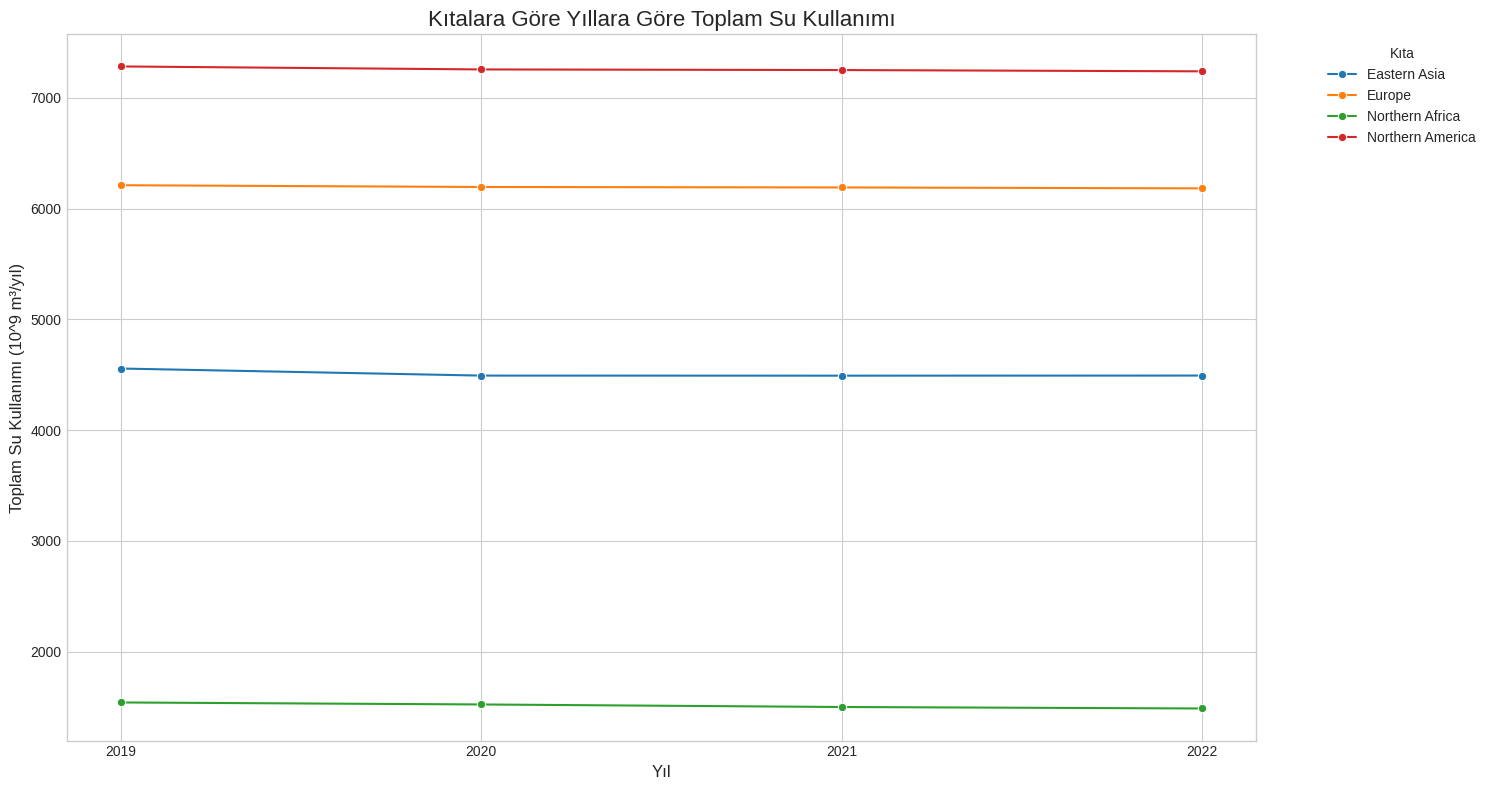

In [ ]:
# Sütun adlarını tekrar İngilizce'ye çevirerek daha temiz bir kod yazabiliriz
# Ya da Türkçe isimlerle devam edebilirsiniz, bu sadece bir örnek
# new_data.columns = ['Variable', 'Area', 'Year', 'Value']

# Yıllık bazda kıtalara göre toplam su kullanımını gruplama
yillik_su_kullanimi = new_data.groupby(['Year', 'Area'])['Value'].sum().reset_index()

# Çizgi grafiği oluşturma
plt.figure(figsize=(15, 8))
sns.lineplot(
    data=yillik_su_kullanimi,
    x='Year',
    y='Value',
    hue='Area', # Her kıta için farklı bir çizgi
    marker='o' # Veri noktalarını belirginleştirmek için
)

# Grafiğe başlık ve eksen etiketleri ekleme
plt.title('Kıtalara Göre Yıllara Göre Toplam Su Kullanımı', fontsize=16)
plt.xlabel('Yıl', fontsize=12)
plt.ylabel('Toplam Su Kullanımı (10^9 m³/yıl)', fontsize=12)

# Legend'ı dışarıya alma
plt.legend(title='Kıta', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(yillik_su_kullanimi['Year'].unique())
plt.tight_layout()
plt.show()

# **Her Kıtanın Tarımsal Su Tüketimi (Agricultural water withdrawal) Verisinin, Çubuk Grafiği (Bar Chart) ile Gösterimi**

**Bu analiz, her bir kıtanın tüm yıllar boyunca ne kadar tarımsal suyu kullandığını bize göstermektedir.**

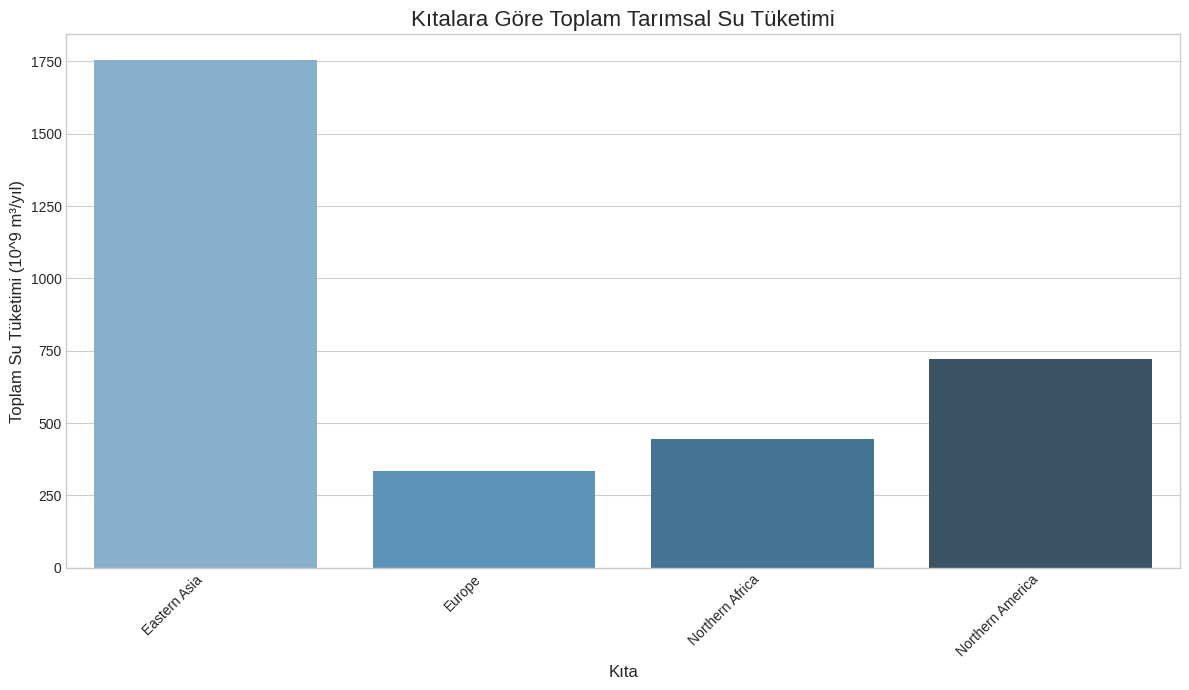

In [ ]:
# Sadece tarımsal su tüketimi verisini filtreleme
tarimsal_su_tuketimi = new_data[new_data['Variable'] == 'Agricultural water withdrawal']

# Kıtalara göre tarımsal su tüketimi toplamını hesaplama
toplam_tarimsal_su = tarimsal_su_tuketimi.groupby('Area')['Value'].sum().reset_index()

# Çubuk grafiği oluşturma
plt.figure(figsize=(12, 7))
sns.barplot(
    data=toplam_tarimsal_su,
    x='Area',
    y='Value',
    palette='Blues_d'
)

# Başlık ve etiketler
plt.title('Kıtalara Göre Toplam Tarımsal Su Tüketimi', fontsize=16)
plt.xlabel('Kıta', fontsize=12)
plt.ylabel('Toplam Su Tüketimi (10^9 m³/yıl)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# **Her Kıtanın Sanayi Su Kullanımı (Industrial water withdrawal) Verisinin, Çubuk Grafik (Bar Chart) ve Sunburst Chart (Güneş Patlaması Grafiği) ile Gösterimi**

**Bu analiz, her bir kıtanın tüm yıllar boyunca ne kadar sanayi suyu kullandığını bize göstermektedir.**

In [ ]:
import pandas as pd
import plotly.express as px

# Veriyi okuma ve hazırlama
# df = pd.read_csv('AQUASTAT - kıta analizi.xlsx - Data.csv')

# İsimleri kolaylaştırma
# df.columns = ['m49', 'VariableGroup', 'Subgroup', 'Variable', 'Area', 'Year', 'Value', 'Unit', 'Symbol', 'IsAggregate']

# Sadece sanayi su tüketimi verilerini filtreleme
industrial_water = new_data[new_data['Variable'] == 'Industrial water withdrawal']

# Kıtalara göre toplam sanayi su tüketimini hesaplama
toplam_industrial = industrial_water.groupby('Area')['Value'].sum().reset_index()

# Sonuçları ekrana yazdırın
print(toplam_industrial)

               Area       Value
0      Eastern Asia  503.224800
1            Europe  501.552790
2   Northern Africa   24.927167
3  Northern America  948.092067


In [ ]:
!pip install plotly

**Her Kıtanın Sanayi Su Kullanımı Verisinin Sunburst Chart ile Gösterimi**

**Sunburst chart, hiyerarşik veriyi dairesel bir şekilde görselleştirir. Bu dinamik ve interaktif gösterimde, merkezden dışa doğru, verilerin daha alt seviyeleri gösterilmektedir. Bu veri setinde, merkezde Variable (değişken), dış halkada ise Area (kıta) yer almaktadır. Bu gösterim, toplam sanayi su kullanımının kıtalara göre nasıl dağıldığını dinamik bir şekilde görmemizi sağlar.**

In [ ]:
# Sunburst chart oluşturma
fig = px.sunburst(
    industrial_water,
    path=['Variable', 'Area'], # Merkezden dışa doğru hiyerarşi
    values='Value',
    color='Value',
    color_continuous_scale='Viridis',
    title='Kıtalara Göre Sanayi Su Tüketimi Dağılımı (Sunburst Chart)'
)

fig.show()

**Her Kıtanın Sanayi Su Kullanımı Verisinin Çubuk Grafik (Bar Chart) ile Gösterimi**




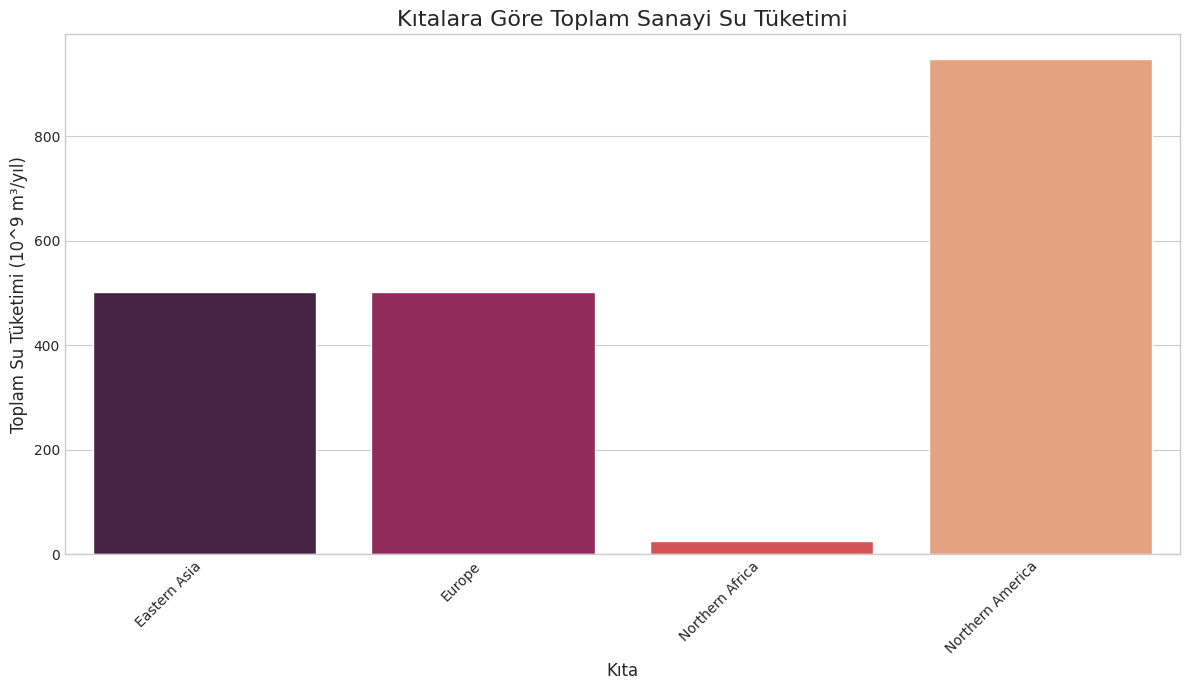

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grafik stilini ayarlama
sns.set_style("whitegrid")

# Çubuk grafik oluşturma
plt.figure(figsize=(12, 7))
sns.barplot(
    data=toplam_industrial,
    x='Area',
    y='Value',
    palette='rocket'
)

plt.title('Kıtalara Göre Toplam Sanayi Su Tüketimi', fontsize=16)
plt.xlabel('Kıta', fontsize=12)
plt.ylabel('Toplam Su Tüketimi (10^9 m³/yıl)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# **Her Kıtanın Sulama Suyu İhtiyacı (Irrigation water requirement) Verisinin, Treemap (Etkileşimli Ağaç Haritası) ve Çubuk Grafik (Bar Chart) ile Gösterimi**

In [ ]:
import pandas as pd
import plotly.express as px

# Veriyi okuma ve hazırlama
# df = pd.read_csv('AQUASTAT - kıta analizi.xlsx - Data.csv')

# Sütun adlarını basitleştirme
# df.columns = ['m49', 'VariableGroup', 'Subgroup', 'Variable', 'Area', 'Year', 'Value', 'Unit', 'Symbol', 'IsAggregate']

# Sadece sulama suyu ihtiyacı verilerini filtreleme
irrigation_data = new_data[new_data['Variable'] == 'Irrigation water requirement']

# Kıtalara göre toplam sulama suyu ihtiyacını hesaplama
toplam_sulama_ihtiyaci = irrigation_data.groupby('Area')['Value'].sum().reset_index()

# Sonuçlara göz atın
print(toplam_sulama_ihtiyaci)

               Area       Value
0      Eastern Asia  1209.06400
1            Europe   174.32096
2   Northern Africa   227.31600
3  Northern America   444.17600


**Her Kıtanın Sulama Suyu İhtiyacı Verisinin Treemap/Ağaç Haritası ile Gösterimi**

**Bu grafik, hiyerarşik verileri iç içe geçmiş dikdörtgenler kullanarak gösterir. Dolayısıyla, bu grafik ile hangi kıtaların sulama suyu ihtiyacında en baskın olduğu tek bir bakışta görülebilir. Her bir dikdörtgenin boyutu, temsil ettiği değerle doğru orantılıdır. Yani, en büyük sulama ihtiyacına sahip kıta, en büyük dikdörtgenle gösterilir.
Buna göre, özellikle Asya gibi çok büyük değerlere sahip kıtalar, grafiğin büyük bir kısmını kaplamaktadır.**

In [ ]:
# Ağaç haritası (treemap) oluşturma
fig = px.treemap(
    toplam_sulama_ihtiyaci,
    path=['Area'],  # Kıtaları hiyerarşinin en üst seviyesi olarak ayarla
    values='Value',
    color='Value',
    color_continuous_scale='YlGnBu',  # Renk paletini belirleme
    title='Kıtalara Göre Toplam Sulama Suyu İhtiyacı Dağılımı (Treemap)'
)

fig.update_traces(textinfo="label+value")
fig.show()

**Her Kıtanın Sulama Suyu İhtiyacı Verisinin Çubuk Grafik ile Gösterimi**

In [ ]:
# Veriyi değere göre sıralama
toplam_sulama_ihtiyaci_sirali = toplam_sulama_ihtiyaci.sort_values(by='Value', ascending=False)

# Etkileşimli çubuk grafik oluşturma
fig = px.bar(
    toplam_sulama_ihtiyaci_sirali,
    x='Area',
    y='Value',
    color='Area',
    title='Kıtalara Göre Toplam Sulama Suyu İhtiyacı (Sıralı)'
)

fig.update_layout(
    xaxis_title="Kıta",
    yaxis_title="Toplam Sulama Suyu İhtiyacı (10^9 m³/yıl)"
)

fig.show()

# **Her Kıtanın Belediye Su Kullanımı (Municipal water withdrawal) Verisinin, Treemap (Etkileşimli Ağaç Haritası) ve Çubuk Grafik (Bar Chart) ile Gösterimi**

In [ ]:
import pandas as pd
import plotly.express as px

# Veriyi okuma ve hazırlama
# df = pd.read_csv('AQUASTAT - kıta analizi.xlsx - Data.csv')

# Sütun adlarını basitleştirme
# df.columns = ['m49', 'VariableGroup', 'Subgroup', 'Variable', 'Area', 'Year', 'Value', 'Unit', 'Symbol', 'IsAggregate']

# Sadece belediye suyu kullanımı verilerini filtreleme
municipal_data = new_data[new_data['Variable'] == 'Municipal water withdrawal']

# Kıtalara göre toplam belediye suyu kullanımını hesaplama
toplam_belediye_suyu = municipal_data.groupby('Area')['Value'].sum().reset_index()

# Sonuçlara göz atın
print(toplam_belediye_suyu)

               Area       Value
0      Eastern Asia  548.940400
1            Europe  298.793053
2   Northern Africa   71.074900
3  Northern America  253.063100


**Her Kıtanın Belediye Su Kullanımı Verisinin Treemap/Ağaç Haritası ile Gösterimi**




**Bu grafik, hangi kıtaların belediye suyu kullanımında en baskın olduğunu tek bir bakışta gösterir. Özellikle Asya gibi çok büyük değerlere sahip kıtalar, grafiğin büyük bir kısmını kaplamaktadır.**

In [ ]:
# Ağaç haritası (treemap) oluşturma
fig = px.treemap(
    toplam_belediye_suyu,
    path=['Area'],  # Kıtaları hiyerarşinin en üst seviyesi olarak ayarla
    values='Value',
    color='Value',
    color_continuous_scale='YlGnBu',  # Renk paletini belirleme
    title='Kıtalara Göre Toplam Belediye Suyu Kullanımı Dağılımı (Treemap)'
)

fig.update_traces(textinfo="label+value")
fig.show()

**Her Kıtanın Belediye Su Kullanımı Verisinin Çubuk Grafik ile Gösterimi**

In [ ]:
# Veriyi değere göre sıralama
toplam_belediye_suyu_sirali = toplam_belediye_suyu.sort_values(by='Value', ascending=False)

# Etkileşimli çubuk grafik oluşturma
fig = px.bar(
    toplam_belediye_suyu_sirali,
    x='Area',
    y='Value',
    color='Area',
    title='Kıtalara Göre Toplam Belediye Suyu Kullanımı (Sıralı)'
)

fig.update_layout(
    xaxis_title="Kıta",
    yaxis_title="Toplam Belediye Suyu Kullanımı (10^9 m³/yıl)"
)

fig.show()

#**Her Kıtanın Çevresel Akış Gereksinimleri (Environmental Flow Requirements) Verisinin, Treemap (Etkileşimli Ağaç Haritası) ve Çizgi Grafiği (Line Plot) ile Gösterimi**

**Çevresel Akış Gereksinimleri (Environmental Flow Requirements / EFR) verisi, diğer su kullanım türlerinden farklı bir anlama sahiptir. Bu veri, nehirlerin, göllerin ve sulak alanların ekosistemlerini sağlıklı tutmak için ihtiyaç duyduğu su miktarını ifade eder. Bu nedenle, bir kıtanın su yönetimi politikalarının ne kadar sürdürülebilir olduğunu anlamak için çok önemlidir.**

In [ ]:
import pandas as pd
import plotly.express as px

# Veriyi oku
# df = pd.read_csv('AQUASTAT - kıta analizi.xlsx - Data.csv')

# Sütun adlarını basitleştir
# df.columns = ['m49', 'VariableGroup', 'Subgroup', 'Variable', 'Area', 'Year', 'Value', 'Unit', 'Symbol', 'IsAggregate']

# Sadece çevresel akış gereksinimi verisini filtrele
efr_data = new_data[new_data['Variable'] == 'Environmental Flow Requirements']

# Kıtalara göre toplam çevresel akış gereksinimlerini hesapla
toplam_efr = efr_data.groupby('Area')['Value'].sum().reset_index()

# Sonuçlara göz at
print(toplam_efr)

               Area       Value
0      Eastern Asia   7144.2400
1            Europe  18600.7700
2   Northern Africa    124.4148
3  Northern America  13688.0000


**Her Kıtanın Çevresel Akış Gereksinimlerinin Treemap/Ağaç Haritası ile Gösterimi**

**Her kıtanın toplam çevresel akış gereksinimleri (EFR) içindeki oransal payını gösterir. Büyük bir dikdörtgen, daha yüksek bir gereksinimi temsil eder. Bu gösterim, toplam değer içinde en büyük paya sahip olanları anında görmenizi sağlar.**

In [ ]:
# Ağaç haritası oluştur
fig = px.treemap(
    toplam_efr,
    path=['Area'],
    values='Value',
    color='Value',
    color_continuous_scale='Greens',
    title='Kıtalara Göre Toplam Çevresel Akış Gereksinimleri Dağılımı (Treemap)'
)

fig.update_traces(textinfo="label+value")
fig.show()

**Her Kıtanın Çevresel Akış Gereksinimleri Verisinin Çizgi Grafiği ile Gösterimi**

Elimizdeki veri setinde yıllara göre farklı değerler olduğundan, bu grafiği kullanarak zaman içindeki değişimi gözlemlemek mümkündür.

In [ ]:
# Yıllık bazda kıtalara göre toplam EFR'yi grupla
yillik_efr = efr_data.groupby(['Year', 'Area'])['Value'].sum().reset_index()

# Çizgi grafiği oluştur
fig = px.line(
    yillik_efr,
    x='Year',
    y='Value',
    color='Area',
    markers=True,
    title='Kıtalara Göre Yıllık Çevresel Akış Gereksinimleri Değişimi'
)

fig.show()

**Çevresel Akış Gereksinimleri (EFR) Verisinin, Toplam Su Kullanımı Verisiyle Karşılaştırma**

**Bu grafik, bir kıtanın toplam su kullanımının ne kadarlık bir kısmını çevresel akışa ayırdığını göstermektedir (EFR / Toplam Su Kullanımı).**

In [ ]:
# Toplam su kullanımı verisini hesapla
toplam_su_kullanimi = new_data.groupby(['Area', 'Year'])['Value'].sum().reset_index()

# EFR verisini toplam su kullanımı verisiyle birleştir
efr_oranlari = pd.merge(efr_data, toplam_su_kullanimi, on=['Area', 'Year'], suffixes=('_EFR', '_Toplam'))

# Oranı hesapla (EFR'nin toplam su kullanımına oranı)
efr_oranlari['EFR_Orani'] = (efr_oranlari['Value_EFR'] / efr_oranlari['Value_Toplam']) * 100

# Oranları çubuk grafiğiyle görselleştir
fig = px.bar(
    efr_oranlari,
    x='Area',
    y='EFR_Orani',
    color='Area',
    title='Kıtalara Göre Su Kullanımının Yüzdesel Olarak EFR Karşılığı'
)

fig.show()

#**Her Kıtanın Su Ürünleri Yetiştiriciliği (Water withdrawal for aquaculture) verisinin, Çubuk Grafik (Bar Chart) ve Treemap (Etkileşimli Ağaç Haritası) ile Gösterimi**

**Bu veri türü, diğer su kullanım alanlarına kıyasla genellikle daha küçük hacimlerde olabilir, ancak belirli bölgeler için hayati öneme sahiptir.**

In [ ]:
import pandas as pd
import plotly.express as px

# Veriyi oku
# df = pd.read_csv('AQUASTAT - kıta analizi.xlsx - Data.csv')

# Sütun adlarını düzenle
# df.columns = ['m49', 'VariableGroup', 'Subgroup', 'Variable', 'Area', 'Year', 'Value', 'Unit', 'Symbol', 'IsAggregate']

# Sadece su ürünleri yetiştiriciliği verisini filtrele
aquaculture_data = new_data[new_data['Variable'] == 'Water withdrawal for aquaculture']

# Kıtalara göre toplam su kullanımını hesapla
toplam_aquaculture = aquaculture_data.groupby('Area')['Value'].sum().reset_index()

# Sonuçlara göz at
print(toplam_aquaculture)

               Area      Value
0      Eastern Asia  32.800000
1            Europe  26.301938
2   Northern Africa   0.000000
3  Northern America  11.052000


 **Her Kıtanın Su Ürünleri Yetiştiriciliği (Water withdrawal for aquaculture) verisinin, Çubuk Grafik (Bar Chart) ile Gösterimi**

In [ ]:
# Veriyi değere göre sırala
toplam_aquaculture_sirali = toplam_aquaculture.sort_values(by='Value', ascending=False)

# Etkileşimli çubuk grafik oluştur
fig = px.bar(
    toplam_aquaculture_sirali,
    x='Area',
    y='Value',
    color='Area',
    title='Kıtalara Göre Su Ürünleri Yetiştiriciliği İçin Toplam Su Kullanımı'
)

fig.update_layout(
    xaxis_title="Kıta",
    yaxis_title="Toplam Su Kullanımı (10^9 m³/yıl)"
)

fig.show()

**Her Kıtanın Su Ürünleri Yetiştiriciliği (Water withdrawal for aquaculture) verisinin, Treemap (Etkileşimli Ağaç Haritası) ve ile Gösterimi**

In [ ]:
# Remove rows with zero values as treemap cannot handle them
toplam_aquaculture_filtered = toplam_aquaculture[toplam_aquaculture['Value'] > 0]

# Ağaç haritası (treemap) oluştur
fig = px.treemap(
    toplam_aquaculture_filtered,
    path=['Area'],  # Kıtaları hiyerarşinin en üst seviyesi olarak ayarla
    values='Value',
    color='Value',
    color_continuous_scale='YlGnBu',  # Renk paletini belirle
    title='Kıtalara Göre Su Ürünleri Yetiştiriciliği İçin Su Kullanımı Dağılımı (Treemap)'
)

fig.update_traces(textinfo="label+value")
fig.show()

# **Her Kıtanın Hayvancılık için Su Kullanımı (Water withdrawal for livestock) verisinin, Çubuk Grafik (Bar Chart) ve Treemap (Etkileşimli Ağaç Haritası) ve ile Gösterimi**

In [23]:
import pandas as pd
import plotly.express as px

# Veriyi oku
# df = pd.read_csv('AQUASTAT - kıta analizi.xlsx - Data.csv')

# Sütun adlarını basitleştir
# df.columns = ['m49', 'VariableGroup', 'Subgroup', 'Variable', 'Area', 'Year', 'Value', 'Unit', 'Symbol', 'IsAggregate']

# Sadece hayvancılık için su kullanımı verisini filtrele
livestock_data = new_data[new_data['Variable'] == 'Water withdrawal for livestock (watering and cleaning)']

# Kıtalara göre toplamını hesapla
toplam_livestock = livestock_data.groupby('Area')['Value'].sum().reset_index()

# Sonuçlara göz at
print(toplam_livestock)

               Area      Value
0      Eastern Asia   2.099200
1            Europe   8.507382
2   Northern Africa   0.000000
3  Northern America  48.152750


 **Her Kıtanın Hayvancılık için Su Kullanımı (Water withdrawal for livestock) verisinin, Çubuk Grafik (Bar Chart) ile Gösterimi**

**Bu grafik, her kıtanın bu alanda toplam su kullanımını bir çubukla gösterir. Buna göre, hangi kıtanın bu alanda daha fazla su kullandığı (Kuzey Amerika) rahatlıkla anlaşılabilir.**

In [24]:
# Veriyi değere göre sırala
toplam_livestock_sirali = toplam_livestock.sort_values(by='Value', ascending=False)

# Etkileşimli çubuk grafik oluştur
fig = px.bar(
    toplam_livestock_sirali,
    x='Area',
    y='Value',
    color='Area',
    title='Kıtalara Göre Hayvancılık İçin Toplam Su Kullanımı'
)

fig.update_layout(
    xaxis_title="Kıta",
    yaxis_title="Toplam Su Kullanımı (10^9 m³/yıl)"
)

fig.show()

 **Her Kıtanın Hayvancılık için Su Kullanımı (Water withdrawal for livestock) verisinin, Treemap (Etkileşimli Ağaç Haritası) ile Gösterimi**

In [26]:
# Ağaç haritası (treemap) oluştur
# Filter out rows with zero values as treemap cannot handle them
toplam_livestock_filtered = toplam_livestock[toplam_livestock['Value'] > 0]

fig = px.treemap(
    toplam_livestock_filtered,
    path=['Area'],
    values='Value',
    color='Value',
    color_continuous_scale='YlOrRd',
    title='Kıtalara Göre Hayvancılık İçin Su Kullanımı Dağılımı (Treemap)'
)

fig.update_traces(textinfo="label+value")
fig.show()

# **Her Kıtanın Su Kullanım Trendleriyle ilgili Yıllık Değişim Analizinin, Çizgi Grafiği (Line Plot) ile Gösterimi**

**Şimdiye kadar yapılan analizler genellikle toplam değerlere odaklandı, ancak verideki yıllık değişimi incelemek, su kullanım trendleri hakkında çok önemli bilgiler bize vermektedir.
Bu analiz ile, her bir kıtanın farklı su kullanım türlerinde (tarım, sanayi, belediye vb.) zaman içinde nasıl bir değişim yaşadığını görselleştirilmiştir. Bu analiz, su yönetimi politikalarının veya iklim olaylarının su tüketimi üzerindeki etkilerini anlamanıza yardımcı olmaktadır.
Bu grafik sayesinde, örneğin Asya'daki tarımsal su tüketiminin yıllar içindeki sabitliğini veya Avrupa'daki sanayi su tüketiminin ufak dalgalanmalarını tek bir bakışta görebilmekteyiz.**

In [8]:
import pandas as pd
import plotly.express as px

# Use the existing DataFrame 'new_data' instead of reading the file again
# df = pd.read_csv('AQUASTAT - kıta analizi.xlsx - Data.csv')

# Sütun adlarını düzenle (This step is no longer needed as new_data already has the correct columns)
# df.columns = ['m49', 'VariableGroup', 'Subgroup', 'Variable', 'Area', 'Year', 'Value', 'Unit', 'Symbol', 'IsAggregate']

# Yıllık bazda, her bir değişkenin ve kıtanın toplam su kullanımını grupla
yillik_trend = new_data.groupby(['Year', 'Area', 'Variable'])['Value'].sum().reset_index()

# Çizgi grafiği oluşturma
fig = px.line(
    yillik_trend,
    x='Year',
    y='Value',
    color='Area', # Her kıta için farklı bir renk
    line_dash='Variable', # Her değişken için farklı bir çizgi stili
    markers=True,
    title='Kıtalara Göre Yıllık Su Kullanım Trendleri (2019-2022)',
    labels={
        'Value': 'Su Kullanımı (10^9 m³/yıl)',
        'Area': 'Kıta',
        'Variable': 'Su Kullanım Türü'
    }
)

# Grafiği daha okunaklı hale getirme
fig.update_layout(
    xaxis_title='Yıl',
    yaxis_title='Toplam Su Kullanımı (10^9 m³/yıl)',
    xaxis={'tickmode': 'linear'}
)

fig.show()

**Burada farklı grafik gösterimleri yaptım, hangisi aklınıza yatarsa onu seçeriz!!!!!**:)

**Her Kıta İçin Oluşturulan Ayrı Çizgi Grafikleri (Line Plot)**

In [10]:
import pandas as pd
import plotly.express as px

# Veriyi oku
# df = pd.read_csv('AQUASTAT - kıta analizi.xlsx - Data.csv')

# Sütun adlarını düzenle
# df.columns = ['m49', 'VariableGroup', 'Subgroup', 'Variable', 'Area', 'Year', 'Value', 'Unit', 'Symbol', 'IsAggregate']

# Use the existing DataFrame 'new_data' instead of reading the file again
df = new_data.copy()

# Yıllık bazda, her bir değişkenin ve kıtanın toplamını grupla
yillik_trend = df.groupby(['Year', 'Area', 'Variable'])['Value'].sum().reset_index()

# Çizgi grafiğini "facet_col" parametresi ile oluşturma
# Her "Area" (Kıta) için ayrı bir sütun/grafik oluşturulur
fig = px.line(
    yillik_trend,
    x='Year',
    y='Value',
    color='Variable', # Her değişken için farklı bir renk
    markers=True,
    facet_col='Area', # Her kıta için ayrı bir alt grafik oluştur
    facet_col_wrap=4, # Her satıra 4 grafik yerleştir
    title='Kıtalara Göre Yıllık Su Kullanım Trendleri (2019-2022)'
)

# Grafiği daha okunaklı hale getirme
fig.update_layout(
    xaxis_title='Yıl',
    yaxis_title='Toplam Su Kullanımı (10^9 m³/yıl)',
    xaxis={'tickmode': 'linear'}
)

# Alt grafik başlıklarını daha anlaşılır yapma
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))

fig.show()

Küçük Çoklu Grafikler (Facet Plots)
Bu yöntem, her kıta için ayrı bir alt grafik oluşturarak veriyi düzenler. Çizgiler artık birbirine karışmaz ve trendleri kolayca karşılaştırabilirsiniz. Bu kod, önceki cevaptaki kodu biraz daha optimize ederek sunar.

In [14]:
import pandas as pd
import plotly.express as px

# Veriyi oku
# df = pd.read_csv('AQUASTAT - kıta analizi.xlsx - Data.csv')

# Sütun adlarını düzenle
df.columns = ['m49', 'VariableGroup', 'Subgroup', 'Variable', 'Area', 'Year', 'Value', 'Unit', 'Symbol', 'IsAggregate']

# Yıllık bazda, her bir değişkenin ve kıtanın toplam su kullanımını grupla
yillik_trend = df.groupby(['Year', 'Area', 'Variable'])['Value'].sum().reset_index()

# Çizgi grafiğini facet_col (sütun bazlı ayırma) ile oluştur
# Her "Area" (Kıta) için ayrı bir sütun/grafik oluşturulur
fig = px.line(
    yillik_trend,
    x='Year',
    y='Value',
    color='Variable',  # Her değişken için farklı bir renk
    line_dash='Variable', # Farklı çizgi stili ekle
    markers=True,
    facet_col='Area', # Her kıta için ayrı bir alt grafik oluştur
    facet_col_wrap=4, # Her satırda en fazla 4 grafik göster
    title='Kıtalara Göre Yıllık Su Kullanım Trendleri (2019-2022)'
)

# Alt grafik başlıklarını daha anlaşılır yap
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))

# Eksen etiketlerini ve düzeni güncelle
fig.update_layout(
    xaxis_title='Yıl',
    yaxis_title='Toplam Su Kullanımı (10^9 m³/yıl)',
    xaxis={'tickmode': 'linear'}
)
fig.show()

Etkileşimli Filtreleme (Dropdown Menu)
Bu çözümde, tüm kıtaları aynı grafikte göstermek yerine, bir açılır menüden istediğiniz kıtayı seçebilir ve sadece o kıtanın verilerini görüntüleyebilirsiniz. Bu, tek bir temiz grafik üzerinde daha fazla kontrol sağlar. Bu kodun çalışması için Jupyter Notebook gibi etkileşimli bir ortam gereklidir.

In [13]:
import pandas as pd
import plotly.express as px
from ipywidgets import interactive, Dropdown
from IPython.display import display

# Veriyi oku
# df = pd.read_csv('AQUASTAT - kıta analizi.xlsx - Data.csv')

# Sütun adlarını düzenle
df.columns = ['m49', 'VariableGroup', 'Subgroup', 'Variable', 'Area', 'Year', 'Value', 'Unit', 'Symbol', 'IsAggregate']

# Yıllık bazda, her bir değişkenin ve kıtanın toplamını grupla
yillik_trend = df.groupby(['Year', 'Area', 'Variable'])['Value'].sum().reset_index()

# Kıta listesini oluştur
kitalar = sorted(yillik_trend['Area'].unique().tolist())

# Grafiği oluşturan fonksiyonu tanımla
def plot_by_continent(selected_continent):
    filtered_data = yillik_trend[yillik_trend['Area'] == selected_continent]

    fig = px.line(
        filtered_data,
        x='Year',
        y='Value',
        color='Variable',
        line_dash='Variable',
        markers=True,
        title=f'{selected_continent} İçin Yıllık Su Kullanım Trendleri',
        labels={'Value': 'Su Kullanımı (10^9 m³/yıl)', 'Variable': 'Su Kullanım Türü'}
    )

    fig.update_layout(
        xaxis_title='Yıl',
        yaxis_title='Toplam Su Kullanımı (10^9 m³/yıl)',
        xaxis={'tickmode': 'linear'}
    )

    fig.show()

# Dropdown menüyü oluştur ve fonksiyonu bağla
dropdown = Dropdown(
    options=kitalar,
    value=kitalar[0],
    description='Kıta Seçin:',
)

# Etkileşimli widget'ı göster
interactive_plot = interactive(plot_by_continent, selected_continent=dropdown)
display(interactive_plot)

interactive(children=(Dropdown(description='Kıta Seçin:', options=('Eastern Asia', 'Europe', 'Northern Africa'…

# **Sonuç: Kıtasal Anlamda Su Kullanımı ve Sektörel Dağılımlara Dair Önemli Çıkarımlar**

1.   Tarım Sektörünün Baskınlığı: Analizlerimizde net bir şekilde görüldü ki, kıtalar genelinde su kullanımının en büyük bölümü tarımsal faaliyetler tarafından gerçekleştiriliyor. Özellikle Doğu ve Güney Asya gibi bölgelerde, toplam su kullanımının büyük bir yüzdesi tarım için ayrılmış durumda. Bu durum, gıda güvenliği ve su kaynakları yönetimi arasındaki karmaşık ilişkiyi ve tarımsal su kullanım verimliliğinin önemini vurgulamaktadır.
2.   Coğrafi Eşitsizlik: Kıtaların toplam su kullanımı arasında önemli bir fark bulunmaktadır. Nüfusu ve tarımsal üretimi yüksek olan Asya kıtası, diğer kıtalara kıyasla açık ara en yüksek su kullanımına sahiptir. Bu, küresel su kaynakları üzerindeki baskının coğrafi olarak eşit dağılmadığını ve bazı bölgelerin bu konuda daha savunmasız olduğunu göstermektedir.
3.   Toplam Tüketim ve Kişi Başı Tüketim Farkı: Yaptığımız kişi başına düşen su kullanımı analizi, toplam değerlerin her zaman doğru bir tablo sunmadığını ortaya koymaktadır. Bir kıta toplamda daha az su kullanıyor gibi görünse de, nüfusu az olduğu için kişi başına düşen su kullanımı yüksek olabilir. Bu da su kaynaklarının kullanım verimliliği açısından daha derinlemesine bir değerlendirme yapılması gerektiğini gösterir.
4.   Sektörel Önceliklerin Farklılığı: Kıtadan kıtaya su kullanım türlerinin dağılımı farklılık göstermektedir. Sanayi, belediye, hayvancılık ve su ürünleri yetiştiriciliği gibi sektörler, bazı bölgelerde toplam kullanım içinde daha büyük bir paya sahipken, diğerlerinde oldukça düşüktür. Bu durum, her kıtanın kendi ekonomik yapısı ve öncelikleri doğrultusunda farklı su yönetimi stratejileri benimsemesi gerektiğini işaret eder.
5.   Zaman İçindeki Trendler: Yıllık bazda yaptığımız zaman serisi analizi, su kullanımının durağan olmadığını ve yıllara göre değişiklik gösterdiğini ortaya koymuştur. Bu değişimler, iklim olayları (kuraklıklar), yeni su yönetimi politikaları veya ekonomik gelişim gibi faktörlerle ilişkilendirilebilir. Bu veriler, gelecekteki su kullanım trendlerini öngörmek için değerli bir temel oluşturur.

Sonuç olarak, bu çıkarımlar, elimizdeki su yönetimi, çevresel sürdürülebilirlik ve küresel ekonomiye dair önemli bulguları bize vermektedir.








# **KITA Bazında Yıllara Grafikler**

**KITA BAZINDA YILLARA GÖRE GRAFİKLER**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving AQUASTAT Dissemination System.xlsx to AQUASTAT Dissemination System (1).xlsx


In [ ]:
data = pd.read_csv("AQUASTAT Dissemination System.csv")
data.head()

In [ ]:
new_data = data.copy()
display(new_data.head())

In [ ]:
new_data.tail()

In [ ]:
new_data.info()

In [ ]:
new_data.isnull().any()

In [ ]:
new_data.describe()

In [ ]:
new_data.drop("m49", axis = 1, inplace = True)
new_data.head()

In [ ]:
new_data["VariableGroup"].unique()

In [ ]:
new_data.drop("VariableGroup", axis=1, inplace=True)
new_data.head()

# Tüm başlıkların altındaki verileri gördüğümüz kod bloğu (Video öncesi silinebilir)

In [ ]:
#tum basliklarin altindaki verileri bir kodda gormek icin. Ayri ayri gordugumuz kodlar daha asagida
for col in new_data.columns:
    print(f"\n--- {col} ---")
    print(new_data[col].unique())



--- Subgroup ---
['Water withdrawal by sector']

--- Variable ---
['Agricultural water withdrawal'
 'Agricultural water withdrawal as % of total water withdrawal'
 'Agricultural water withdrawal per capita'
 'Environmental Flow Requirements' 'Industrial water withdrawal'
 'Industrial water withdrawal as % of total water withdrawal'
 'Industrial water withdrawal per capita' 'Irrigation water requirement'
 'Irrigation water withdrawal' 'Municipal water withdrawal'
 'Municipal water withdrawal as % of total withdrawal'
 'Municipal water withdrawal per capita (total population)'
 'Total water withdrawal' 'Total water withdrawal per capita'
 'Water withdrawal for aquaculture'
 'Water withdrawal for cooling of thermoelectric plants'
 'Water withdrawal for livestock (watering and cleaning)']

--- Area ---
['Albania' 'Algeria' 'Austria' 'Belarus' 'Belgium' 'Bulgaria' 'Canada'
 'Croatia' 'Czechia' "Democratic People's Republic of Korea" 'Denmark'
 'Eastern Asia' 'Egypt' 'Estonia' 'Europe' 'Fin

In [ ]:
new_data["Variable"].unique()

array(['Agricultural water withdrawal',
       'Agricultural water withdrawal as % of total water withdrawal',
       'Agricultural water withdrawal per capita',
       'Environmental Flow Requirements', 'Industrial water withdrawal',
       'Industrial water withdrawal as % of total water withdrawal',
       'Industrial water withdrawal per capita',
       'Irrigation water requirement', 'Irrigation water withdrawal',
       'Municipal water withdrawal',
       'Municipal water withdrawal as % of total withdrawal',
       'Municipal water withdrawal per capita (total population)',
       'Total water withdrawal', 'Total water withdrawal per capita',
       'Water withdrawal for aquaculture',
       'Water withdrawal for cooling of thermoelectric plants',
       'Water withdrawal for livestock (watering and cleaning)'],
      dtype=object)

In [ ]:
new_data["Area"].value_counts()

,count
Area,
Albania,68
Bulgaria,68
Finland,68
Hungary,68
Ireland,68
Lithuania,68
Latvia,68
Poland,68
Romania,68


In [ ]:
new_data["Area"].unique()

array(['Albania', 'Algeria', 'Austria', 'Belarus', 'Belgium', 'Bulgaria',
       'Canada', 'Croatia', 'Czechia',
       "Democratic People's Republic of Korea", 'Denmark', 'Eastern Asia',
       'Egypt', 'Estonia', 'Europe', 'Finland', 'France', 'Germany',
       'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Japan',
       'Latvia', 'Libya', 'Lithuania', 'Luxembourg', 'Malta', 'Monaco',
       'Mongolia', 'Montenegro', 'Morocco',
       'Netherlands (Kingdom of the)', 'North Macedonia',
       'Northern Africa', 'Northern America', 'Norway', 'Poland',
       'Portugal', 'Republic of Korea', 'Republic of Moldova', 'Romania',
       'Russian Federation', 'Serbia', 'Slovakia', 'Slovenia', 'Spain',
       'Sudan', 'Sweden', 'Switzerland', 'Tunisia', 'Türkiye', 'Ukraine',
       'United Kingdom of Great Britain and Northern Ireland',
       'United States of America', 'Andorra', 'Bosnia and Herzegovina',
       'Liechtenstein'], dtype=object)

In [ ]:
new_data["Area"].value_counts()

,count
Area,
Albania,68
Bulgaria,68
Finland,68
Hungary,68
Ireland,68
Lithuania,68
Latvia,68
Poland,68
Romania,68


In [ ]:
new_data["Year"].unique()

array([2019, 2020, 2021, 2022])

In [ ]:
new_data["Year"].value_counts()

,count
Year,
2020,878
2021,878
2022,878
2019,874


In [ ]:
new_data.head()

,Subgroup,Variable,Area,Year,Value,Unit,Symbol,IsAggregate
0,Water withdrawal by sector,Agricultural water withdrawal,Albania,2019,0.692000,10^9 m3/year,A,False
1,Water withdrawal by sector,Agricultural water withdrawal,Albania,2020,0.545000,10^9 m3/year,A,False
2,Water withdrawal by sector,Agricultural water withdrawal,Albania,2021,0.564000,10^9 m3/year,A,False
3,Water withdrawal by sector,Agricultural water withdrawal,Albania,2022,0.565000,10^9 m3/year,A,False
4,Water withdrawal by sector,Agricultural water withdrawal,Algeria,2019,7.151667,10^9 m3/year,I,False


In [ ]:
new_data["Value"].unique()

array([ 0.692,  0.545,  0.564, ...,  0.024,  0.026, 10.43 ])

In [ ]:
new_data["Year"].value_counts()

,count
Year,
2020,878
2021,878
2022,878
2019,874


In [ ]:
new_data["Unit"].unique()

array(['10^9 m3/year', '%', 'm3/inhab/year'], dtype=object)

In [ ]:
new_data["Unit"].value_counts()


,count
Unit,
10^9 m3/year,1928
m3/inhab/year,908
%,672


In [ ]:
new_data["Symbol"].unique()

array(['A', 'I', 'X', 'E'], dtype=object)

In [ ]:
new_data["Symbol"].value_counts()


,count
Symbol,
E,1605
I,1112
A,697
X,94


1. Official

Açıklama: Verinin resmî kaynaklardan geldiğini gösterir.

Örnek: Hükümet, bakanlık veya ulusal istatistik kurumları tarafından sağlanan veriler.

2. I (veya Imputed)

Açıklama: Eksik veya bilinmeyen verilerin tahmini (imputation) değerleri ile doldurulduğunu gösterir.

Örnek: Bazı ülkeler veri sağlamadıysa, model veya hesaplama ile eksik değerler tamamlanmış olabilir.

3. E (Estimate)

Açıklama: Verinin tahmini değer olduğunu gösterir. Resmî veri yoksa uzmanlar veya modeller aracılığıyla hesaplanır.

4. X

Açıklama: Genellikle veri yok veya mevcut değil anlamına gelir.

5. Export (X)

Açıklama: Eğer “X” bu sütunda ise, genellikle ihraç edilen miktarı ifade eder.

Örnek: Su, ürün veya tarım ürünü ihracatında kullanılan su miktarı.

In [ ]:
new_data["IsAggregate"].unique()

array([False,  True])

In [ ]:
new_data["IsAggregate"].value_counts()


,count
IsAggregate,
False,3252
True,256


IsAggregate sütunu neyi gösterir?

Eğer IsAggregate değeri True ise:

Bu satırın toplam veya birden fazla alt birimin hesaplaması olduğunu gösterir.

Eğer False ise:

Bu satır bireysel veya tekil ölçümü temsil eder.

Örnek Tablo:

Country	Water_Use	IsAggregate
USA	50000	True
California	12000	False
Texas	15000	False

Burada USA satırı tüm ABD’nin toplam su kullanımı, yani aggregate.

California ve Texas satırları sadece bireysel eyalet ölçümleri, yani aggregate değil.

3. Kullanımı

Veri temizleme veya analiz yaparken, IsAggregate=True satırlarıyla çift sayım yapmamak için bu sütunu dikkate alabilirsin.

Örneğin:

# Sadece bireysel ölçümleri al
df_no_agg = df[df['IsAggregate'] == False]


In [ ]:
non_aggregate_data = new_data[new_data['IsAggregate'] == False]
display(non_aggregate_data)

,Subgroup,Variable,Area,Year,Value,Unit,Symbol,IsAggregate
0,Water withdrawal by sector,Agricultural water withdrawal,Albania,2019,0.692000,10^9 m3/year,A,False
1,Water withdrawal by sector,Agricultural water withdrawal,Albania,2020,0.545000,10^9 m3/year,A,False
2,Water withdrawal by sector,Agricultural water withdrawal,Albania,2021,0.564000,10^9 m3/year,A,False
3,Water withdrawal by sector,Agricultural water withdrawal,Albania,2022,0.565000,10^9 m3/year,A,False
4,Water withdrawal by sector,Agricultural water withdrawal,Algeria,2019,7.151667,10^9 m3/year,I,False
...,...,...,...,...,...,...,...,...
3503,Water withdrawal by sector,Water withdrawal for livestock (watering and c...,United Kingdom of Great Britain and Northern I...,2022,0.026000,10^9 m3/year,I,False
3504,Water withdrawal by sector,Water withdrawal for livestock (watering and c...,United States of America,2019,10.430000,10^9 m3/year,I,False
3505,Water withdrawal by sector,Water withdrawal for livestock (watering and c...,United States of America,2020,10.430000,10^9 m3/year,I,False
3506,Water withdrawal by sector,Water withdrawal for livestock (watering and c...,United States of America,2021,10.430000,10^9 m3/year,I,False


In [ ]:
aggregate_data = new_data[new_data['IsAggregate'] == True]
display(aggregate_data.head())

,Subgroup,Variable,Area,Year,Value,Unit,Symbol,IsAggregate
44,Water withdrawal by sector,Agricultural water withdrawal,Eastern Asia,2019,444.350900,10^9 m3/year,E,True
45,Water withdrawal by sector,Agricultural water withdrawal,Eastern Asia,2020,437.260900,10^9 m3/year,E,True
46,Water withdrawal by sector,Agricultural water withdrawal,Eastern Asia,2021,437.060900,10^9 m3/year,E,True
47,Water withdrawal by sector,Agricultural water withdrawal,Eastern Asia,2022,437.060900,10^9 m3/year,E,True
56,Water withdrawal by sector,Agricultural water withdrawal,Europe,2019,85.474145,10^9 m3/year,E,True


# KITA BAZINDA GRAFİKLER

**KITA BAZINDA GRAFİKLER**
*   Global Değişkenler ve Fonksiyonlar
*   Kıtaların Toplam Su Kullanım Oranı(2022) (Pie Chart)
*   Kıtaların Toplam Su Kullanım Oranı(2022) (Bar Chart)
*   Kıta Bazında Sektörel Su Kullanımı Dağılımı(2022) (Bar Chart)
*   Kıtalara Göre Kişi Başı Su Kullanımı(2022)(Bar Chart)
*   Su Kullanımı Karşılaştırması(2022) (Heatmap)
*   Kıtalar Bazında Tarımsal Su Kullanımı(2022) (Kabarcık Grafiği)(Bubble Chart)
*   Kıtalar Bazında Endüstriyel Su Kullanımı(2022)(Kabarcık Grafiği)
*   Kıtalar Bazında Belediye Su Kullanımı(2022) (Kabarcık Grafiği)
*   Kıtalar Bazında Yıllara Göre Su Kullanımı (Slope Chart)


## Global Değişkenler ve Fonksiyonlar

In [ ]:
# =============================================================================
# Grafiklerde kullanilan ortak degiskenleri ve fonksiyonlari tanimlama
# =============================================================================

# Tum kitalar
continents = aggregate_data[aggregate_data['IsAggregate']==True]['Area'].unique()

continents_custom_order = ['Eastern Asia', 'Northern America', 'Europe', 'Northern Africa']

# Kitalarin renk kodlari
continent_colors = {
    'Eastern Asia':'#1F77B4',   # mavi
    'Europe':'#FF7F0E',         # turuncu
    'Northern Africa':'#2CA02C',# yeşil
    'Northern America':'#D62728'# kırmızı
}

# Su kullanım türlerinin Türkçe karşılıkları
water_variables_turkish = {
    'Agricultural water withdrawal': 'Tarımsal Su Kullanımı',
    'Industrial water withdrawal': 'Endüstriyel Su Kullanımı',
    'Municipal water withdrawal': 'Belediye Su Kullanımı',
    'Total water withdrawal': 'Toplam Su Kullanımı',
    'Agricultural water withdrawal as % of total water withdrawal': 'Tarımsal Su Kullanımı (% Toplam)',
    'Industrial water withdrawal as % of total water withdrawal': 'Endüstriyel Su Kullanımı (% Toplam)',
    'Total water withdrawal per capita': 'Kişi Başı Toplam Su Kullanımı',
    'Agricultural water withdrawal per capita': 'Kişi Başı Tarımsal Su Kullanımı',
    'Industrial water withdrawal per capita': 'Kişi Başı Endüstriyel Su Kullanımı',
    'Municipal water withdrawal per capita (total population)': 'Kişi Başı Belediye Su Kullanımı'
}

# Kitalarin Türkçe karşılıkları
turkish_labels = {
    'Europe':'Avrupa',
    'Eastern Asia':'Doğu Asya',
    'Northern Africa':'Kuzey Afrika',
    'Northern America':'Kuzey Amerika'
}

latest_year = aggregate_data['Year'].max() # 2022 yilini secmek icin

continent_data = new_data[(new_data['IsAggregate']==True) & (new_data['Year']==2022)] #Kitalar ve 2022 yilini secmek icin

#2022 yilindaki toplam su kullanimini secmek icin
total_water_withdrawal_2022 = aggregate_data[(aggregate_data['Year']==2022) &
                       (aggregate_data['Variable']=='Total water withdrawal')]

# Fonksiyonlar

# Su kullanım türleri icin
def get_tr_variable(variable):
    return water_variables_turkish.get(variable, variable)
# Kita isimleri icin
def get_tr_labels(areas):
    return [turkish_labels.get(area, area) for area in areas]


## Kıtaların Toplam Su Kullanım Oranı(2022) (Pie Chart)

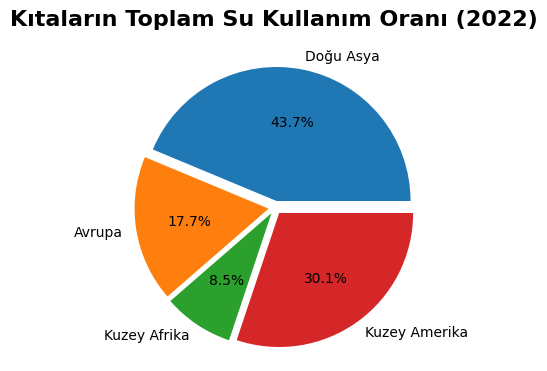

In [ ]:
# =============================================================================
#  Kıtaların Toplam Su Kullanım Oranı(2022) (Pie Chart)
# =============================================================================

labels = get_tr_labels(total_water_withdrawal_2022['Area'])  # Türkçe labelları al basta belirtilen fonksiyonla
sizes = total_water_withdrawal_2022['Value']
colors = [continent_colors.get(area, '#333333') for area in total_water_withdrawal_2022['Area']]
explode = [0.05]*len(labels)

plt.figure(figsize=(6, 4))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%', # 43.7%, 17.7%, vs. seklinde yazabilmek icin
    explode=explode,
    colors=colors
)
plt.title(f'Kıtaların Toplam Su Kullanım Oranı ({latest_year})', fontsize=16, fontweight='bold', pad=20)
plt.axis('equal')
plt.show()

## Kıtaların Toplam Su Kullanım Oranı(2022) (Bar Chart)

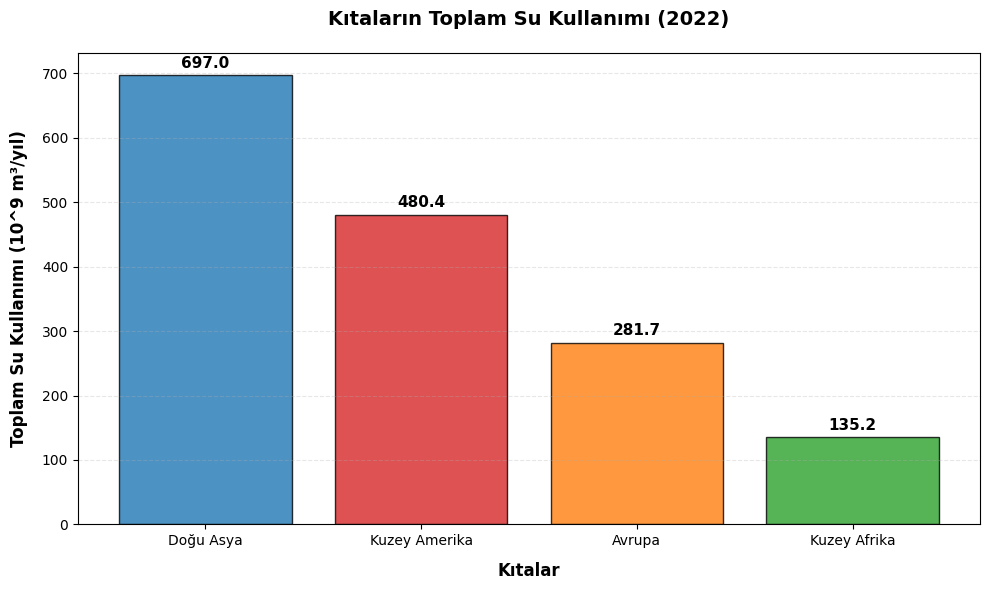

In [ ]:
# =============================================================================
# Kıtaların Toplam Su Kullanım Oranı(2022) (Bar Chart)
# =============================================================================

# Bu yukaridaki pie chart verisinin aynisi, sadece bar chart olarak duzenlendi.
# Yukarida yuzde olarak verildi, burada metrekup cinsinden.

ordered_data = []
for continent in continents_custom_order:
    cont_data = total_water_withdrawal_2022[total_water_withdrawal_2022['Area'] == continent]
    if not cont_data.empty:
        ordered_data.append({
            'Area': continent,
            'Value': cont_data['Value'].iloc[0]
        })

areas = [item['Area'] for item in ordered_data]
values = [item['Value'] for item in ordered_data]
labels = get_tr_labels(areas)
colors = [continent_colors.get(area, '#333333') for area in areas]

plt.figure(figsize=(10, 6))
bars = plt.bar(labels, values, color=colors, alpha=0.8, edgecolor='black', linewidth=1)

# Değerleri barların üstüne ekle
for i, (bar, value) in enumerate(zip(bars, values)):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(values)*0.01,
            f'{value:.1f}', ha='center', va='bottom', fontweight='bold', fontsize=11)

plt.xlabel('Kıtalar', labelpad=10, fontsize=12, fontweight='bold')
plt.ylabel('Toplam Su Kullanımı (10^9 m³/yıl)', labelpad=10, fontsize=12, fontweight='bold')
plt.title(f'Kıtaların Toplam Su Kullanımı ({latest_year})',
          fontsize=14, fontweight='bold', pad=20)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

## Kıta Bazında Sektörel Su Kullanımı Dağılımı(2022) (Bar Chart)

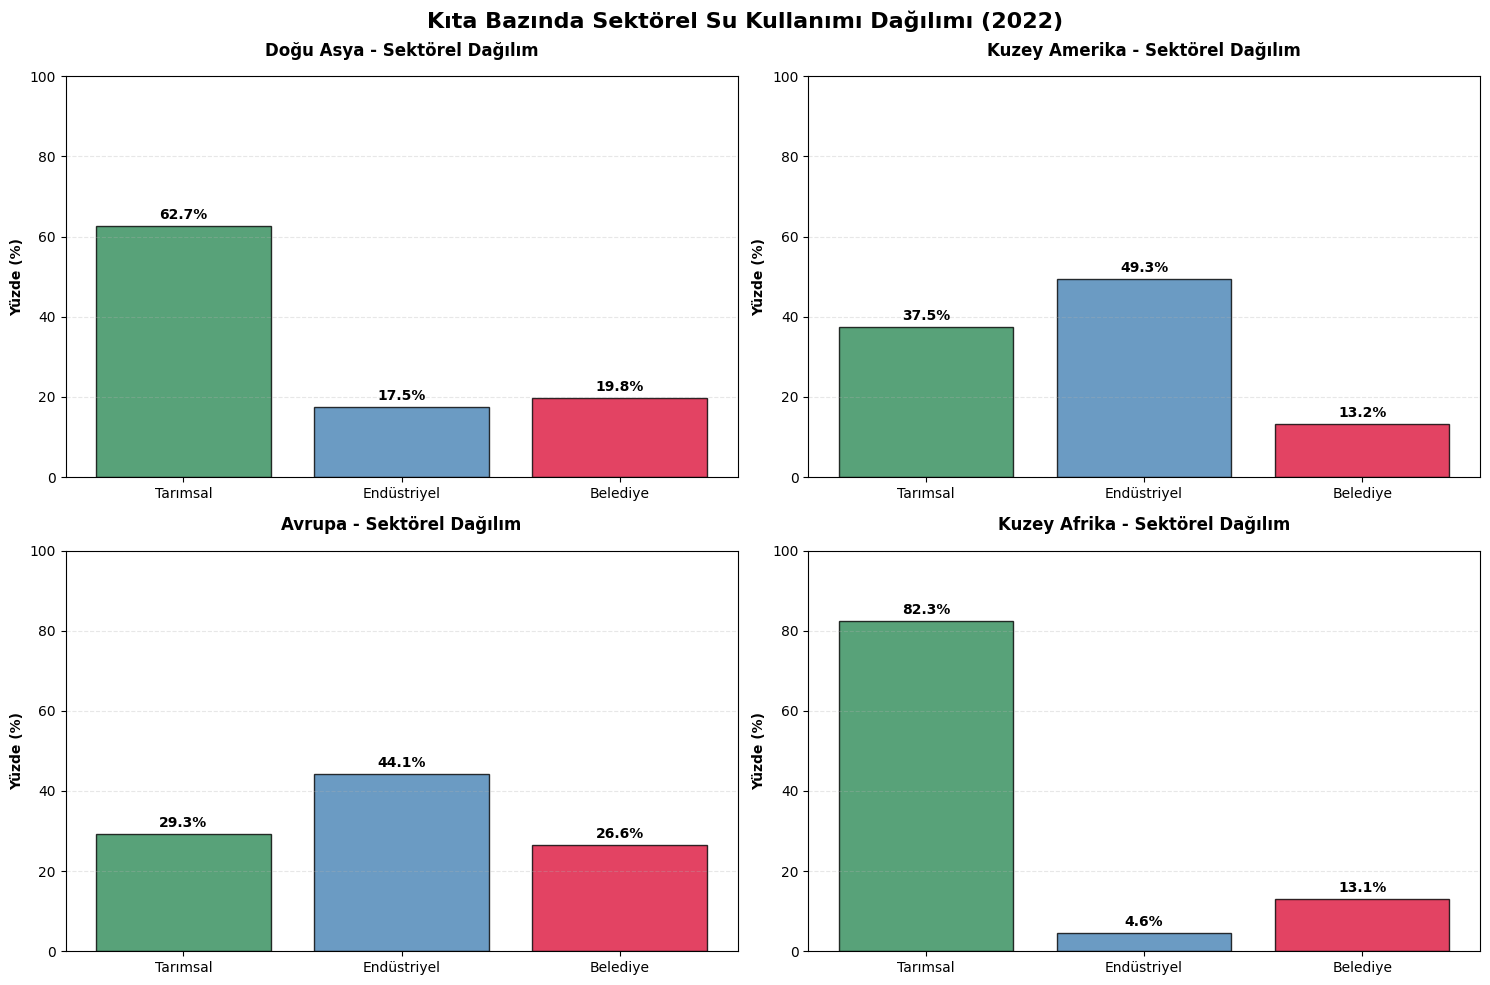

In [ ]:

# =============================================================================
# Kıta Bazında Sektörel Su Kullanımı Dağılımı(2022) (Bar Chart)
# =============================================================================

continent_data = new_data[new_data['IsAggregate'] == True]
latest_year = continent_data['Year'].max()

# Yüzde değişkenleri
percentage_variables = [
    'Agricultural water withdrawal as % of total water withdrawal',
    'Industrial water withdrawal as % of total water withdrawal'
]

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for i, continent in enumerate(continents_custom_order):
    # Her kıta için ayrı grafik
    agri_data = continent_data[
        (continent_data['Area'] == continent) &
        (continent_data['Variable'] == percentage_variables[0]) &
        (continent_data['Year'] == latest_year)
    ]

    ind_data = continent_data[
        (continent_data['Area'] == continent) &
        (continent_data['Variable'] == percentage_variables[1]) &
        (continent_data['Year'] == latest_year)
    ]

    agri_pct = agri_data['Value'].iloc[0] if not agri_data.empty else 0
    ind_pct = ind_data['Value'].iloc[0] if not ind_data.empty else 0
    municipal_pct = 100 - agri_pct - ind_pct  #

    categories = ['Tarımsal', 'Endüstriyel', 'Belediye']
    values = [agri_pct, ind_pct, municipal_pct]
    colors_sect = ['#2E8B57', '#4682B4', '#DC143C']  # Yeşil, Mavi, Kırmızı

    bars = axes[i].bar(categories, values, color=colors_sect, alpha=0.8,
                      edgecolor='black', linewidth=1)


    for bar, value in zip(bars, values):
        axes[i].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                    f'{value:.1f}%', ha='center', va='bottom',
                    fontweight='bold', fontsize=10)

    axes[i].set_title(f'{get_tr_labels([continent])[0]} - Sektörel Dağılım',
                     fontsize=12, fontweight='bold', pad=15)
    axes[i].set_ylabel('Yüzde (%)', fontsize=10, fontweight='bold')
    axes[i].set_ylim(0, 100)
    axes[i].grid(axis='y', linestyle='--', alpha=0.3)

plt.suptitle(f'Kıta Bazında Sektörel Su Kullanımı Dağılımı ({latest_year})',
             fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

## Kıtalara Göre Kişi Başı Su Kullanımı(2022) (Bar chart)

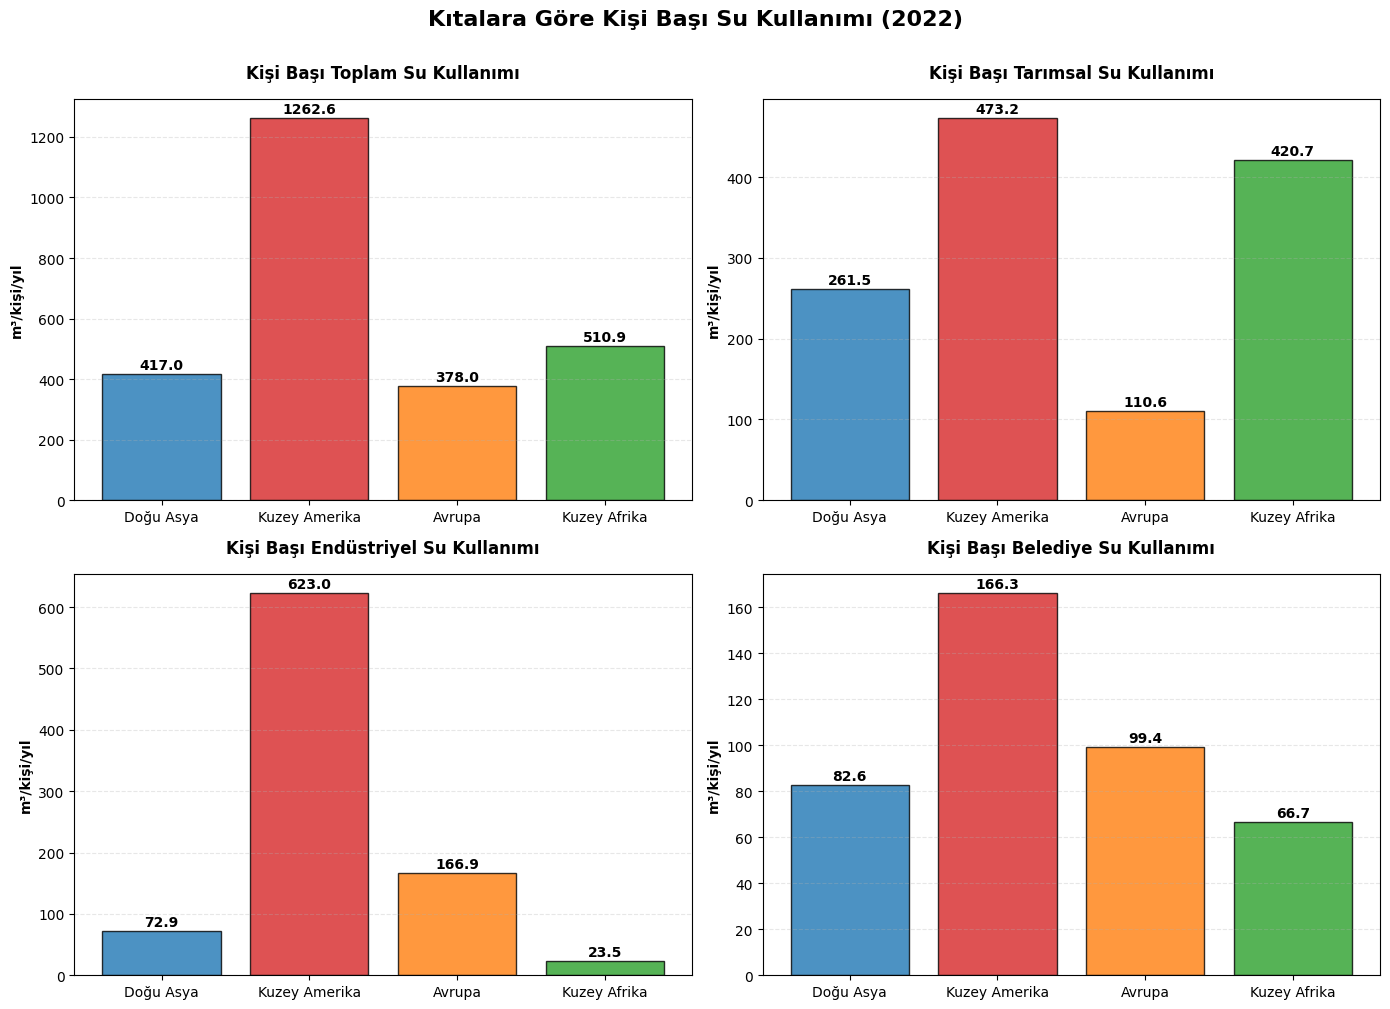

In [ ]:
# =============================================================================
# Kıtalara Göre Kişi Başı Su Kullanımı(2022) (Bar chart)
# =============================================================================

continent_data = new_data[new_data['IsAggregate'] == True]
latest_year = continent_data['Year'].max()

per_capita_variables = [
    'Total water withdrawal per capita',
    'Agricultural water withdrawal per capita',
    'Industrial water withdrawal per capita',
    'Municipal water withdrawal per capita (total population)'
]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, variable in enumerate(per_capita_variables):
    values = []
    labels = []
    colors = []

    for continent in continents_custom_order:
        data = continent_data[
            (continent_data['Area'] == continent) &
            (continent_data['Variable'] == variable) &
            (continent_data['Year'] == latest_year)
        ]

        if not data.empty:
            values.append(data['Value'].iloc[0])
            labels.append(get_tr_labels([continent])[0])
            colors.append(continent_colors.get(continent, '#333333'))

    bars = axes[i].bar(labels, values, color=colors, alpha=0.8,
                      edgecolor='black', linewidth=1)

    for bar, value in zip(bars, values):
        axes[i].text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(values)*0.005,
                    f'{value:.1f}', ha='center', va='bottom',
                    fontweight='bold', fontsize=10)

    axes[i].set_title(get_tr_variable(variable), fontsize=12, fontweight='bold', pad=15)
    axes[i].set_ylabel('m³/kişi/yıl', fontsize=10, fontweight='bold')
    axes[i].grid(axis='y', linestyle='--', alpha=0.3)

plt.suptitle(f'Kıtalara Göre Kişi Başı Su Kullanımı ({latest_year})',
             fontsize=16, fontweight='bold', y=1.005)
plt.tight_layout()
plt.show()

## Su Kullanımı Karşılaştırması(2022) (Heatmap)

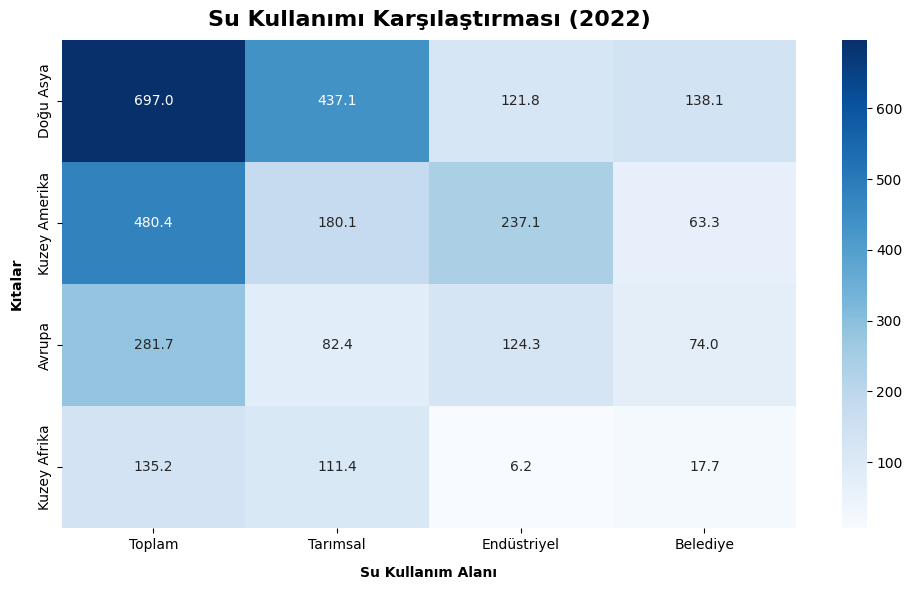

In [ ]:
# =============================================================================
# Su Kullanımı Karşılaştırması(2022) (Heatmap)
# =============================================================================

continent_data = new_data[new_data['IsAggregate'] == True]
latest_year = continent_data['Year'].max()

key_variables = [
    'Total water withdrawal',
    'Agricultural water withdrawal',
    'Industrial water withdrawal',
    'Municipal water withdrawal'
]

# X ekseni labelları için Türkçe çeviri
x_labels = [get_tr_variable(var) for var in key_variables]
x_labels_short = ['Toplam', 'Tarımsal', 'Endüstriyel', 'Belediye']

# Create matrix
heatmap_data = []
for continent in continents_custom_order:
    row = []
    for variable in key_variables:
        subset = continent_data[
            (continent_data['Area'] == continent) &
            (continent_data['Variable'] == variable) &
            (continent_data['Year'] == latest_year)
        ]
        value = subset['Value'].iloc[0] if not subset.empty else 0
        row.append(value)
    heatmap_data.append(row)

# Plot heatmap
plt.figure(figsize=(10, 6))
plt.xticks(rotation=0)  # Yatay etiketler

sns.heatmap(heatmap_data,
           xticklabels=x_labels_short,
           yticklabels=[get_tr_labels([c])[0] for c in continents_custom_order], # Türkçe kita isimleri
           annot=True, fmt='.1f', cmap='Blues')
plt.title(f'Su Kullanımı Karşılaştırması ({latest_year})', fontsize=16, fontweight='bold', pad=10)
plt.xlabel('Su Kullanım Alanı', labelpad=10, fontsize=10, fontweight='bold')  # X ekseni başlığı
plt.ylabel('Kıtalar', labelpad=10, fontsize=10, fontweight='bold')
plt.tight_layout()
plt.show()

## Kıtalar Bazında Tarımsal Su Kullanımı(2022) (Kabarcık Grafiği)(Bubble Chart)

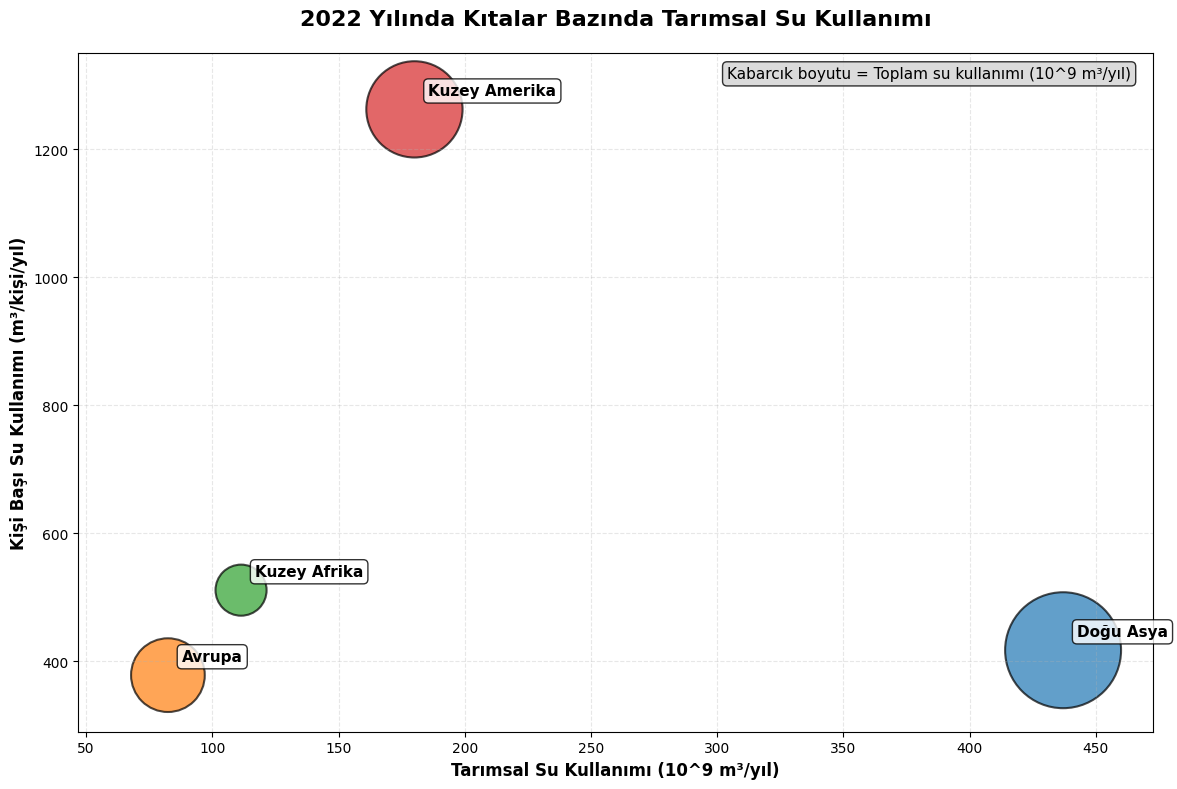

In [ ]:
# =============================================================================
# Kıtalar Bazında Tarımsal Su Kullanımı(2022) (Kabarcık Grafiği)(Bubble Chart)
# =============================================================================

continent_data = new_data[(new_data['IsAggregate']==True) & (new_data['Year']==2022)]

agricultural_values = []
per_capita_values = []
bubble_sizes = []
labels = []
colors = []

for cont in continents_custom_order:
    total = continent_data[(continent_data['Area']==cont) &
                           (continent_data['Variable']=='Total water withdrawal')]['Value'].iloc[0]
    per_capita = continent_data[(continent_data['Area']==cont) &
                                (continent_data['Variable']=='Total water withdrawal per capita')]['Value'].iloc[0]
    agricultural = continent_data[(continent_data['Area']==cont) &
                                  (continent_data['Variable']=='Agricultural water withdrawal')]['Value'].iloc[0]

    # Bubble boyutu: toplam su kullanımı (ölçekli)
    bubble_size = total * 10

    agricultural_values.append(agricultural)
    per_capita_values.append(per_capita)
    bubble_sizes.append(bubble_size)
    labels.append(get_tr_labels([cont])[0])
    colors.append(continent_colors.get(cont, '#333333'))

# Bubble chart
plt.figure(figsize=(12,8))
plt.scatter(agricultural_values, per_capita_values, s=bubble_sizes,
            c=colors, alpha=0.7, edgecolors='black', linewidth=1.5)
plt.margins(x=0.1, y=0.1)
plt.text(0.98, 0.98, 'Kabarcık boyutu = Toplam su kullanımı (10^9 m³/yıl)',
         transform=plt.gca().transAxes, fontsize=11,
         bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.8),
         verticalalignment='top',
         horizontalalignment='right')

# Etiketler
for i, label in enumerate(labels):
    plt.annotate(label, (agricultural_values[i], per_capita_values[i]),
                 xytext=(10,10), textcoords='offset points',
                 fontsize=11, fontweight='bold',
                 bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))

plt.xlabel('Tarımsal Su Kullanımı (10^9 m³/yıl)', fontsize=12, fontweight='bold')
plt.ylabel('Kişi Başı Su Kullanımı (m³/kişi/yıl)', fontsize=12, fontweight='bold')
plt.title('2022 Yılında Kıtalar Bazında Tarımsal Su Kullanımı', fontsize=16, fontweight='bold', pad=20)
plt.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()


## Kıtalar Bazında Endüstriyel Su Kullanımı -2022 (Kabarcık Grafiği)(Bubble Chart)

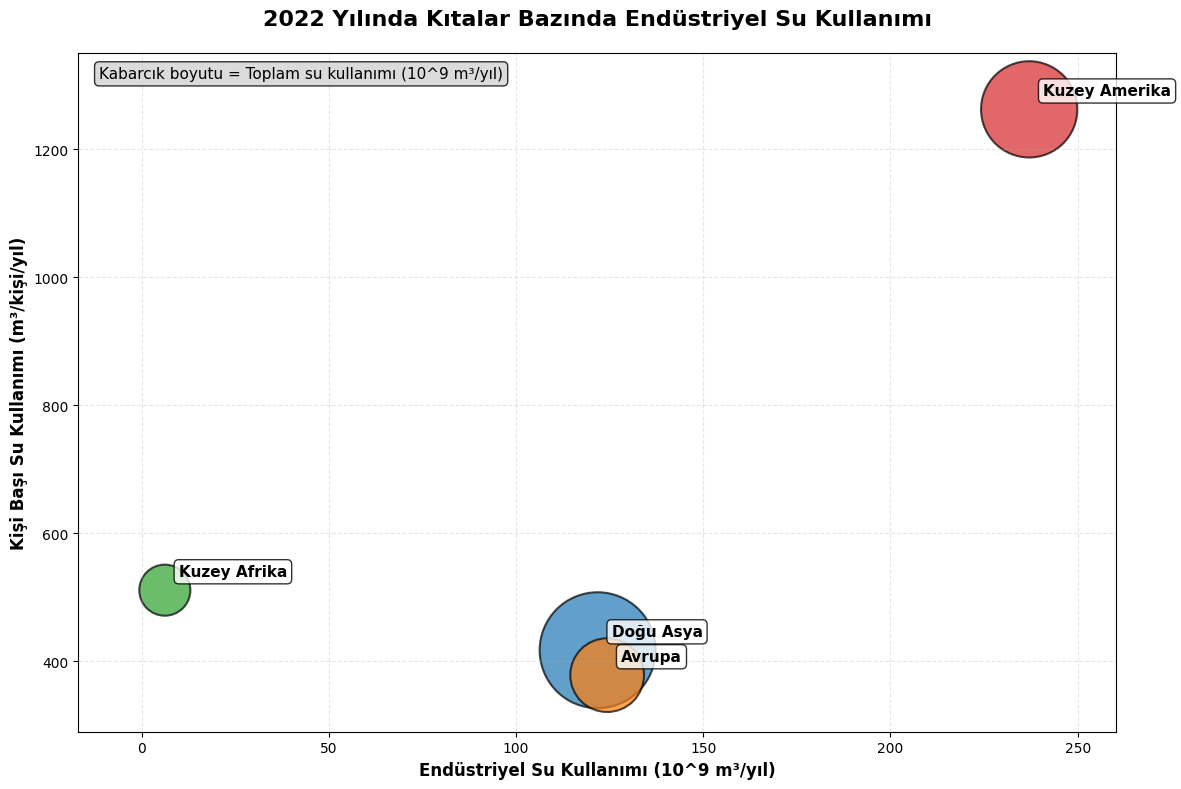

In [ ]:
# =============================================================================
# Kıtalar Bazında Endüstriyel Su Kullanımı -2022 (Kabarcık Grafiği)(Bubble Chart)
# =============================================================================

continent_data = new_data[(new_data['IsAggregate']==True) & (new_data['Year']==2022)]

industrial_values = []
per_capita_values = []
bubble_sizes = []
labels = []
colors = []

for cont in continents_custom_order:
    total = continent_data[(continent_data['Area']==cont) &
                           (continent_data['Variable']=='Total water withdrawal')]['Value'].iloc[0]
    per_capita = continent_data[(continent_data['Area']==cont) &
                                (continent_data['Variable']=='Total water withdrawal per capita')]['Value'].iloc[0]
    industrial = continent_data[(continent_data['Area']==cont) &
                                (continent_data['Variable']=='Industrial water withdrawal')]['Value'].iloc[0]

    # Bubble boyutu: toplam su kullanımı (ölçekli)
    bubble_size = total * 10

    industrial_values.append(industrial)
    per_capita_values.append(per_capita)
    bubble_sizes.append(bubble_size)
    labels.append(get_tr_labels([cont])[0])
    colors.append(continent_colors.get(cont, '#333333'))

# Bubble chart
plt.figure(figsize=(12,8))
plt.scatter(industrial_values, per_capita_values, s=bubble_sizes,
            c=colors, alpha=0.7, edgecolors='black', linewidth=1.5)
plt.margins(x=0.1, y=0.1)
plt.text(0.02, 0.98, 'Kabarcık boyutu = Toplam su kullanımı (10^9 m³/yıl)',
         transform=plt.gca().transAxes, fontsize=11,
         bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.8),
         verticalalignment='top')

# Etiketler
for i, label in enumerate(labels):
    plt.annotate(label, (industrial_values[i], per_capita_values[i]),
                 xytext=(10,10), textcoords='offset points',
                 fontsize=11, fontweight='bold',
                 bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))

plt.xlabel('Endüstriyel Su Kullanımı (10^9 m³/yıl)', fontsize=12, fontweight='bold')
plt.ylabel('Kişi Başı Su Kullanımı (m³/kişi/yıl)', fontsize=12, fontweight='bold')
plt.title('2022 Yılında Kıtalar Bazında Endüstriyel Su Kullanımı', fontsize=16, fontweight='bold', pad=20)
plt.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()


## Kıtalar Bazında Belediye Su Kullanımı (2022) (Kabarcık Grafiği)(Bubble Chart)

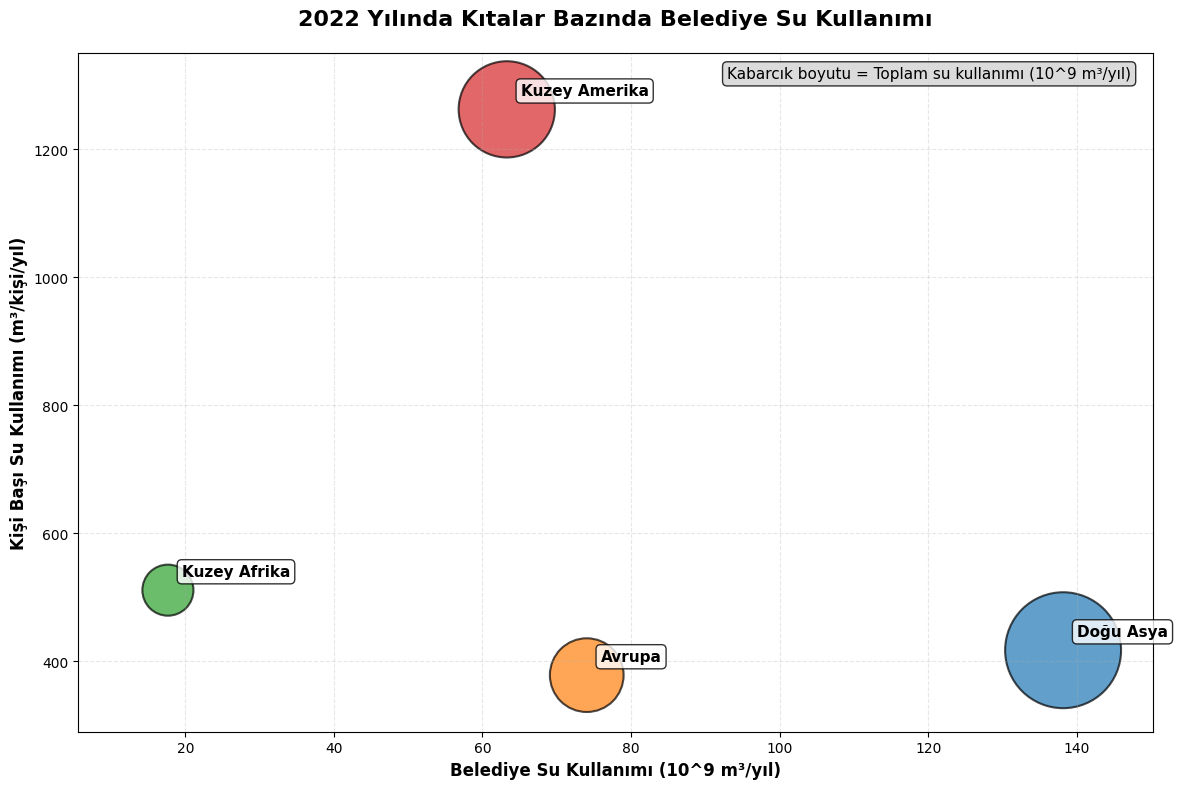

In [ ]:
# =============================================================================
# Kıtalar Bazında Belediye Su Kullanımı (2022) (Kabarcık Grafiği)(Bubble Chart)
# =============================================================================

continent_data = new_data[(new_data['IsAggregate']==True) & (new_data['Year']==2022)]

municipal_values = []
per_capita_values = []
bubble_sizes = []
labels = []
colors = []

for cont in continents_custom_order:
    total = continent_data[(continent_data['Area']==cont) &
                           (continent_data['Variable']=='Total water withdrawal')]['Value'].iloc[0]
    per_capita = continent_data[(continent_data['Area']==cont) &
                                (continent_data['Variable']=='Total water withdrawal per capita')]['Value'].iloc[0]
    municipal = continent_data[(continent_data['Area']==cont) &
                                (continent_data['Variable']=='Municipal water withdrawal')]['Value'].iloc[0]

    # Bubble boyutu: toplam su kullanımı (ölçekli)
    bubble_size = total * 10

    municipal_values.append(municipal)
    per_capita_values.append(per_capita)
    bubble_sizes.append(bubble_size)
    labels.append(get_tr_labels([cont])[0])
    colors.append(continent_colors.get(cont, '#333333'))

# Bubble chart
plt.figure(figsize=(12,8))
plt.scatter(municipal_values, per_capita_values, s=bubble_sizes,
            c=colors, alpha=0.7, edgecolors='black', linewidth=1.5)

plt.margins(x=0.1, y=0.1)
plt.text(0.98, 0.98, 'Kabarcık boyutu = Toplam su kullanımı (10^9 m³/yıl)',
         transform=plt.gca().transAxes, fontsize=11,
         bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.8),
         verticalalignment='top',
         horizontalalignment='right')

# Etiketler
for i, label in enumerate(labels):
    plt.annotate(label, (municipal_values[i], per_capita_values[i]),
                 xytext=(10,10), textcoords='offset points',
                 fontsize=11, fontweight='bold',
                 bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8))

plt.xlabel('Belediye Su Kullanımı (10^9 m³/yıl)', fontsize=12, fontweight='bold')
plt.ylabel('Kişi Başı Su Kullanımı (m³/kişi/yıl)', fontsize=12, fontweight='bold')
plt.title('2022 Yılında Kıtalar Bazında Belediye Su Kullanımı', fontsize=16, fontweight='bold', pad=20)
plt.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()


## Kıtalar Bazında Yıllara Göre Su Kullanımı (Slope Chart)

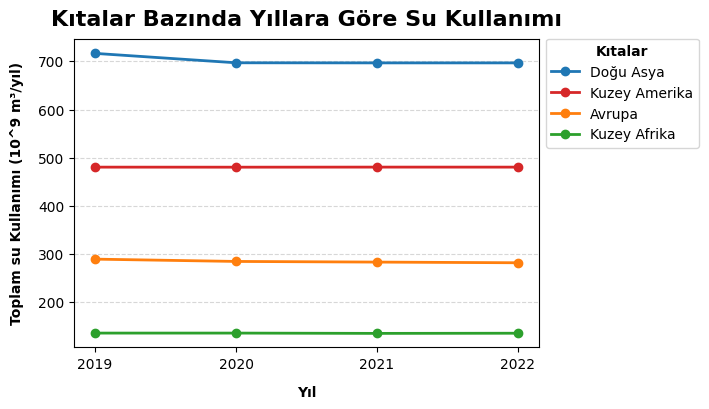

In [ ]:
# =============================================================================
# Kıtalar Bazında Yıllara Göre Su Kullanımı (Slope Chart)
# =============================================================================

subset = aggregate_data[(aggregate_data['Area'].isin(continents)) &
                        (aggregate_data['Variable']=='Total water withdrawal')]

# UI iyilestirmesi - Grafikteki sira ile bilgilendirmedeki siranin eslesmesi icin
continent_final_values = {}
for area in continents:
    temp = subset[subset['Area']==area].sort_values('Year')
    continent_final_values[area] = temp['Value'].iloc[-1]

continents_sorted = sorted(continents, key=lambda x: continent_final_values[x], reverse=True)

# Slope Chart'in olusturulmasi
plt.figure(figsize=(6,4))

for area in continents_sorted:
    temp = subset[subset['Area']==area].sort_values('Year')
    plt.plot(temp['Year'], temp['Value'], marker='o',
            label=get_tr_labels([area])[0],
            color=continent_colors.get(area, '#333333'), linewidth=2)

plt.xlabel('Yıl', fontsize=10, fontweight='bold', labelpad=10)
plt.ylabel('Toplam su Kullanımı (10^9 m³/yıl)', fontsize=10, fontweight='bold', labelpad=10) # 1 Milyar Metrekup
plt.title('Kıtalar Bazında Yıllara Göre Su Kullanımı', fontsize=16, fontweight='bold', pad=10)
plt.xticks(temp['Year'].unique())
plt.grid(axis='y', linestyle='--', alpha=0.5)
legend = plt.legend(title='Kıtalar', loc='upper left', bbox_to_anchor=(1, 1.025))
legend.get_title().set_fontweight('bold')

plt.show()